## Telecom Churn Assignment

### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.o reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 


### Business Goals:

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


### Steps:

#### 1. Data Sourcing

    1. Checking the encoding of the file
    2. Loading the data		

#### 2. Data Exploring & Cleaning

    A. Null Values Analysis
        1. Identify and drop columns with 100% missing data
        2. Identify and drop columns with more than 80% missing data
        3. Identify and drop columns having single unique values as they will not any value to the analysis
        4. Identify and drop unnecessary columns (like text based, Applicant Loan Behaviour)

    B. Datatype Check 

    C. Datatype Conversion
        1. Converting int to object
    
    D. Drop Records
        1. Drop Duplicates
    
    E. Impute Null Values
    
    F. Populating the categorical columns with correct mapping
    
    G. Outliers handling
    
    G. Derived Metrics
    
#### 3. Data Visualisation
#### 4. Data Preparation
#### 5. Splitting and Scaling the data
#### 6. Model Building & Evaluation
#### 7. Regualisation using Ridge and Lasso
#### 8. Making Predictions Using the Final Model on the test data
######################################################################

In [2]:
# Importing all required packages
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn as sns
import datetime
import itertools
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from pandas.api.types import is_object_dtype,is_string_dtype, is_numeric_dtype


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix

from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 10000)
py.offline.init_notebook_mode(connected=True) # plotting in offilne mode 
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
pd.set_option('display.max_colwidth', 1) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 

In [3]:
# Generic Functions

# Method to get Meta-Data about any dataframe passed 
def getMetadata(dataframe) :
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes, # data types of columns
                    'Total_Element': dataframe.count(), # total elements in columns
                    'Null_Count': dataframe.isnull().sum(), # total null values in columns
                    'Null_Percentage': round(dataframe.isnull().sum()/len(dataframe) * 100,2) ,# percentage of null values
                    'Unique_Value': dataframe.nunique()
                       })
    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

def plot_confusion_matrix(cm):
    """
    This function prints and plots the confusion matrix.
    """
    classes=[0,1]
    cmap=plt.cm.Greens
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def prediction_matrix(model,X_train,X_test,y_train,y_test):
    begin = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    end = time.time()
    time_taken=end-begin
#    print('Time taken to predict train and test {} sec'.format(time_taken))
    metric = []
    accuracy_train = round(accuracy_score(y_train,y_pred_train),2)
    recall_train = round(recall_score(y_train,y_pred_train),2)
    precision_train = round(precision_score(y_train,y_pred_train),2)
    auc_train = round(roc_auc_score(y_train,y_pred_train),2)
    f1_train = round(f1_score(y_train,y_pred_train),2)         
    
    accuracy_test = round(accuracy_score(y_test,y_pred_test),2)
    recall_test = round(recall_score(y_test,y_pred_test),2)
    precision_test = round(precision_score(y_test,y_pred_test),2)
    auc_test = round(roc_auc_score(y_test,y_pred_test),2)
    f1_test = round(f1_score(y_test,y_pred_test),2)    

    
    metric.append(accuracy_train)
    metric.append(accuracy_test)
    metric.append(recall_train)
    metric.append(recall_test)
    metric.append(precision_train)
    metric.append(precision_test)
    metric.append(auc_train)
    metric.append(auc_test)
    metric.append(f1_train)
    metric.append(f1_test)


    plt.figure(figsize=(10, 6))
    sns.set(font_scale= 1)
    sns.set_style('whitegrid')
    
    plt.subplot(1,2,1)
    cm = confusion_matrix(y_train,y_pred_train)
    classes=[0,1]
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Train Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    plt.subplot(1,2,2)
    cm = confusion_matrix(y_test,y_pred_test)
    classes=[0,1]
    cmap=plt.cm.Greens
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Test Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    sns.despine()
    
    return metric

def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')



def feature_importance(model,df,title):
# Scatter plot 
    trace = go.Scatter(
        y = model,
        x = df.columns,
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            sizeref = 1.3,
            size = 12,
            color = model,
            colorscale='Portland',
            showscale=True
        ),
        text = df.columns
    )
    data = [trace]

    layout= go.Layout(
        autosize= True,
        title= title,
        hovermode= 'closest',
         xaxis= dict(
             ticklen= 5,
             showgrid=False,
            zeroline=False,
            showline=False
         ),
        yaxis=dict(
            title= 'Feature Importance',
            showgrid=False,
            zeroline=False,
            ticklen= 5,
            gridwidth= 2
        ),
        showlegend= False
    )
    fig = go.Figure(data=data, layout=layout)
    #py.iplot(fig,filename='scatter')
    fig.show(renderer="colab")

def get_variable_type(element) :
    """
     Check is columns are of Contineous or Categorical variable.
     Assumption is that if 
                 unique count < 20 then categorical 
                 unique count >= 20 and dtype = [int64 or float64] then contineous
     """
    if element==0:
        return "Not Known"
    elif element < 20 and element!=0 :
        return "Categorical"
    elif element >= 20 and element!=0 :
        return "Contineous" 
    
def display_columns_with_1_unique_value(dataframe):
    unique_values_count_1 = dataframe[dataframe["Unique_Value"] == 1]
    drop_value_col = unique_values_count_1.index.tolist()
    lenght = len(drop_value_col)
    header("Columns with only one unique value : "+str(lenght))
    if lenght == 0 :
        header_red("No columns with only one unique values.")  
    else :    
        log("Columns with only one unique value :")
        for index,item in enumerate(drop_value_col) :
            print(index,".",item)
            
def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Unique_Value"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix 


def list_potential_categorical_type(dataframe,main) :
    display("Stats for potential Categorical datatype columns")
    metadata_matrix_categorical = dataframe[dataframe["Variable_Type"] == "Categorical"]
    length = len(metadata_matrix_categorical)
    if length == 0 :
        display("No Categorical columns in given dataset.")  
    else :    
        metadata_matrix_categorical = metadata_matrix_categorical.filter(["Datatype","Unique_Value"])
        metadata_matrix_categorical.sort_values(["Unique_Value"], axis=0,ascending=False, inplace=True)
        col_to_check = metadata_matrix_categorical.index.tolist()
        name_list = []
        values_list = []
        for name in col_to_check :
            name_list.append(name)
            values_list.append(main[name].unique())
        temp = pd.DataFrame({"index":name_list,"Unique_Values":values_list})
        metadata_matrix_categorical = metadata_matrix_categorical.reset_index()
        metadata_matrix_categorical = pd.merge(metadata_matrix_categorical,temp,how='inner',on='index')
        display(metadata_matrix_categorical.set_index("index")) 

def plot_data_type_pie_chat(dataframe) : 
        header("Stats for Datatype Percentage Distribution")
        dataframe_group = dataframe.groupby("Datatype").frequency.count().reset_index()
        dataframe_group.sort_values(["Datatype"], axis=0,ascending=False, inplace=True)
        trace = go.Pie(labels=dataframe_group["Datatype"].tolist(), values=dataframe_group["frequency"].tolist())
        layout = go.Layout(title="Datatype Percentage Distribution")
        fig = go.Figure(data=[trace], layout=layout)    
        py.offline.iplot(fig)

def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_df_high_val_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()
        
def get_potential_categorical_type(dataframe,main,unique_count) :
    metadata_matrix_categorical = dataframe[dataframe["Variable_Type"] == "Categorical"]
    metadata_matrix_categorical = dataframe[dataframe["Unique_Values_Count"] == unique_count]
    length = len(metadata_matrix_categorical)
    if length == 0 :
        header_red("No Categorical columns in given dataset.")  
    else :    
        metadata_matrix_categorical = metadata_matrix_categorical.filter(["Datatype","Unique_Value"])
        metadata_matrix_categorical.sort_values(["Unique_Value"], axis=0,ascending=False, inplace=True)
        col_to_check = metadata_matrix_categorical.index.tolist()
        name_list = []
        values_list = []
        for name in col_to_check :
            name_list.append(name)
            values_list.append(main[name].unique())
        temp = pd.DataFrame({"index":name_list,"Unique_Values":values_list})
        metadata_matrix_categorical = metadata_matrix_categorical.reset_index()
        metadata_matrix_categorical = pd.merge(metadata_matrix_categorical,temp,how='inner',on='index')
        display(metadata_matrix_categorical.set_index("index")) 
           
def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for value 
    greater than 10 , black otherwise.
    """
    color = 'red' if val > 5 else 'black'
    return 'color: %s' % color

def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

### Hyperparamter tuning
def tune_hyperparameter(model,parameters, x_train,y_train,n_folds = 5):
    begin = time.time()
    rf = GridSearchCV(model, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
    rf.fit(x_train, y_train)
    scores = rf.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    end = time.time()
    time_taken=end-begin
    print('Time taken to predict train and test {} sec'.format(time_taken))

## Loading dataset for telecom chrun analysis

In [22]:
telecom_df = pd.read_csv("/content/sample_data/telecom_churn_data.csv")
telecom_df.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

## Data Preparation

In [23]:
telecom_df.shape

(99999, 226)

In [24]:
telecom_metadata_df=getMetadata(telecom_df)
telecom_metadata_df

,Datatype,Total_Element,Null_Count,Null_Percentage,Unique_Value,Variable_Type,frequency
mobile_number,int64,99999,0,0.00,99999,Contineous,0
circle_id,int64,99999,0,0.00,1,Categorical,0
loc_og_t2o_mou,float64,98981,1018,1.02,1,Categorical,0
std_og_t2o_mou,float64,98981,1018,1.02,1,Categorical,0
loc_ic_t2o_mou,float64,98981,1018,1.02,1,Categorical,0
last_date_of_month_6,object,99999,0,0.00,1,Categorical,0
last_date_of_month_7,object,99398,601,0.60,1,Categorical,0
last_date_of_month_8,object,98899,1100,1.10,1,Categorical,0
last_date_of_month_9,object,98340,1659,1.66,1,Categorical,0
arpu_6,float64,99999,0,0.00,85681,Contineous,0


**In churn prediction, we assume that there are three phases of customer lifecycle :**
- The ‘good’ phase [Month 6 & 7]
- The ‘action’ phase [Month 8]
- The ‘churn’ phase [Month 9]

**In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.**

### 1.  Derive new features

In [25]:
amt_recharge_columns =  telecom_df.columns[telecom_df.columns.str.contains('rech_amt|rech_data')]
print(amt_recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


<span style='color:green'>**Analysis: From above features we can derive more meaningful information :**
* Total recharge amount
* Total recharge for data
* Maximum recharge amount 
* Last date of Recharging the data
* Average recharge amount for data.
* Maximum recharge for data</span>

In [26]:
# Checking missing values percentages
telecom_df_null_check = 100*telecom_df.loc[:,amt_recharge_columns].isnull().sum()/len(telecom_df)
df = pd.DataFrame(telecom_df_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage).style.applymap(color_red)
display(df)

,Null_Percentage
total_rech_amt_6,0.000000
total_rech_amt_7,0.000000
total_rech_amt_8,0.000000
total_rech_amt_9,0.000000
max_rech_amt_6,0.000000
max_rech_amt_7,0.000000
max_rech_amt_8,0.000000
max_rech_amt_9,0.000000
date_of_last_rech_data_6,74.846748
date_of_last_rech_data_7,74.428744


<span style='color:green'>**Analysis:** We can see more than **74%** values for **recharge** related data are missing.</span>

In [27]:
telecom_df.loc[:,amt_recharge_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,"99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00"
mean,327.51,322.96,324.16,303.35,104.64,104.75,107.73,101.94,2.46,2.67,2.65,2.44,126.39,126.73,125.72,124.94,192.60,200.98,197.53,192.73
std,398.02,408.11,416.54,404.59,120.61,124.52,126.90,125.38,2.79,3.03,3.07,2.52,108.48,109.77,109.44,111.36,192.65,196.79,191.30,188.40
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50,0.50,1.00
25%,109.00,100.00,90.00,52.00,30.00,30.00,30.00,28.00,1.00,1.00,1.00,1.00,25.00,25.00,25.00,25.00,82.00,92.00,87.00,69.00
50%,230.00,220.00,225.00,200.00,110.00,110.00,98.00,61.00,1.00,1.00,1.00,2.00,145.00,145.00,145.00,145.00,154.00,154.00,154.00,164.00
75%,437.50,428.00,434.50,415.00,120.00,128.00,144.00,144.00,3.00,3.00,3.00,3.00,177.00,177.00,179.00,179.00,252.00,252.00,252.00,252.00
max,"35,190.00","40,335.00","45,320.00","37,235.00","4,010.00","4,010.00","4,449.00","3,399.00",61.00,54.00,60.00,84.00,"1,555.00","1,555.00","1,555.00","1,555.00","7,546.00","4,365.00","4,076.00","4,061.00"


<span style='color:green'>**Analysis:** We can create new feature as **total_rech_amt_data** using **total_rech_data** and **av_rech_amt_data** to capture amount utilized by customer for data.

<span style='color:green'>**Analysis:** Also as the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.</span>

In [28]:
telecom_df['total_rech_data_6'] = telecom_df['total_rech_data_6'].replace(np.NaN,0.0)
telecom_df['total_rech_data_7'] = telecom_df['total_rech_data_7'].replace(np.NaN,0.0)
telecom_df['total_rech_data_8'] = telecom_df['total_rech_data_8'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_6'] = telecom_df['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_7'] = telecom_df['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_8'] = telecom_df['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [29]:
# let's adding new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
telecom_df['total_rech_amt_data_6'] = telecom_df.av_rech_amt_data_6 * telecom_df.total_rech_data_6
telecom_df['total_rech_amt_data_7'] = telecom_df.av_rech_amt_data_7 * telecom_df.total_rech_data_7
telecom_df['total_rech_amt_data_8'] = telecom_df.av_rech_amt_data_8 * telecom_df.total_rech_data_8

<span style='color:green'>**Analysis:** Defining total average recharge amount for good phase for months 6 and 7 (the good phase)</span>

In [30]:
telecom_df['total_avg_rech_amnt_6_7_GPhase'] = (telecom_df.total_rech_amt_6 + telecom_df.total_rech_amt_data_6 \
                                               + telecom_df.total_rech_amt_7+ telecom_df.total_rech_amt_data_7)/2

### 2. Filter high-value customers

**Define high-value customers as follows:**
- Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [31]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = telecom_df.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)

display('70 percentile of 6th and 7th months avg recharge amount: '+str(high_value_filter))

telecom_df_high_val_cust = telecom_df[telecom_df.total_avg_rech_amnt_6_7_GPhase > high_value_filter]
display('Dataframe Shape after Filtering High Value Customers: ' + str(telecom_df_high_val_cust.shape))

'70 percentile of 6th and 7th months avg recharge amount: 478.0'

'Dataframe Shape after Filtering High Value Customers: (29953, 230)'

### 3. Tag churners and remove attributes of the churn phase

**Tag churners and remove attributes of the churn phase**
- Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
- The attributes you need to use to tag churners are:**total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9**
- After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [32]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [33]:
# Checking the NA/Null values are present or Not
df = 100*telecom_df_high_val_cust.loc[:,high_val_cust_9].isnull().sum()/len(telecom_df_high_val_cust)
df = pd.DataFrame(df)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage).style.applymap(color_red)
display(df)

,Null_Percentage
total_ic_mou_9,0.000000
total_og_mou_9,0.000000
vol_2g_mb_9,0.000000
vol_3g_mb_9,0.000000


In [34]:
# Initially set all the values as 0
telecom_df_high_val_cust['churn']= 0

In [35]:
#is_churned boolean flag for customers where above values are zero
is_churned = (telecom_df_high_val_cust.total_ic_mou_9 == 0) & \
             (telecom_df_high_val_cust.total_og_mou_9 == 0) & \
             (telecom_df_high_val_cust.vol_2g_mb_9 ==0) & \
             (telecom_df_high_val_cust.vol_3g_mb_9 ==0)

In [36]:
# set all which having is_churned True condition as 1
telecom_df_high_val_cust.loc[is_churned,'churn']=1

In [37]:
# let us check what's the % of churned customers
100*telecom_df_high_val_cust.churn.sum()/len(telecom_df_high_val_cust)

8.122725603445398

In [38]:
churn_month_columns =  telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('_9')]

In [39]:
# drop all columns corresponding to the churn phase
telecom_df_high_val_cust.drop(churn_month_columns,axis=1,inplace=True)

## EDA

### 1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

In [40]:
list_potential_categorical_type(getMetadata(telecom_df_high_val_cust),telecom_df_high_val_cust)

'Stats for potential Categorical datatype columns'

,Datatype,Unique_Value,Unique_Values
index,,,
monthly_3g_7,int64,15,"[1, 0, 2, 5, 3, 8, 4, 7, 6, 9, 11, 12, 14, 10, 16]"
monthly_3g_8,int64,12,"[1, 0, 2, 7, 3, 4, 6, 5, 8, 10, 9, 16]"
monthly_3g_6,int64,12,"[1, 0, 4, 2, 3, 5, 7, 6, 9, 8, 11, 14]"
monthly_2g_8,int64,6,"[0, 1, 2, 5, 3, 4]"
monthly_2g_7,int64,6,"[0, 1, 2, 5, 4, 3]"
monthly_2g_6,int64,5,"[0, 2, 1, 3, 4]"
night_pck_user_6,float64,2,"[0.0, nan, 1.0]"
night_pck_user_7,float64,2,"[0.0, nan, 1.0]"
fb_user_8,float64,2,"[1.0, nan, 0.0]"


<span style='color:green'>**Analysis:** Dropping above features with only **one unique** value as they will not add any value to our model building and analyis</span>

In [41]:
drop_col_with_unique_col =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                          'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [42]:
display("Features before dropping unique values : "+ str(telecom_df_high_val_cust.shape[1]))
telecom_df_high_val_cust.drop(drop_col_with_unique_col,axis=1,inplace=True)
display("Features after dropping unique values : "+ str(telecom_df_high_val_cust.shape[1]))

'Features before dropping unique values : 177'

'Features after dropping unique values : 164'

In [43]:
meta_df = getMetadata(telecom_df_high_val_cust)

In [44]:
meta_df_count = meta_df[meta_df["Datatype"] == 'object']
date_col = meta_df_count.index.tolist()
date_col

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [45]:
telecom_df_high_val_cust[date_col].head(5)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/18/2014,7/7/2014,8/24/2014,NaN,7/7/2014,8/6/2014


In [46]:
for col in date_col:
    telecom_df_high_val_cust[col] = pd.to_datetime(telecom_df_high_val_cust[col])

In [47]:
telecom_df_high_val_cust.head(8)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,197.38,214.82,213.80,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,4.13,nan,nan,1.15,nan,nan,5.44,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,5.44,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.00,1.00,1.00,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0,0,0,0,0,0,1,1,1,0,0,0,1.00,1.00,1.00,968,30.40,0.00,101.20,3.58,252.00,252.00,252.00,559.00,1
7,7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,NaT,NaT,NaT,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [48]:
list_potential_categorical_type(getMetadata(telecom_df_high_val_cust),telecom_df_high_val_cust)

'Stats for potential Categorical datatype columns'

,Datatype,Unique_Value,Unique_Values
index,,,
monthly_3g_7,int64,15,"[1, 0, 2, 5, 3, 8, 4, 7, 6, 9, 11, 12, 14, 10, 16]"
monthly_3g_6,int64,12,"[1, 0, 4, 2, 3, 5, 7, 6, 9, 8, 11, 14]"
monthly_3g_8,int64,12,"[1, 0, 2, 7, 3, 4, 6, 5, 8, 10, 9, 16]"
monthly_2g_7,int64,6,"[0, 1, 2, 5, 4, 3]"
monthly_2g_8,int64,6,"[0, 1, 2, 5, 3, 4]"
monthly_2g_6,int64,5,"[0, 2, 1, 3, 4]"
night_pck_user_6,float64,2,"[0.0, nan, 1.0]"
night_pck_user_7,float64,2,"[0.0, nan, 1.0]"
night_pck_user_8,float64,2,"[0.0, nan, 1.0]"


### 2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

#### a. Recharge amount related variables

In [49]:
recharge_amnt_columns =  telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

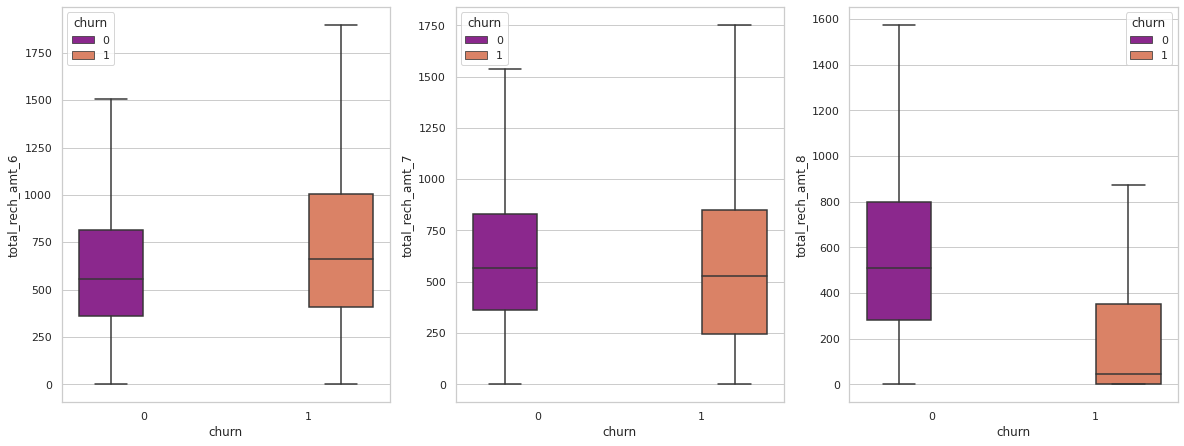

In [50]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

<span style='color:green'>**Analysis:** We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

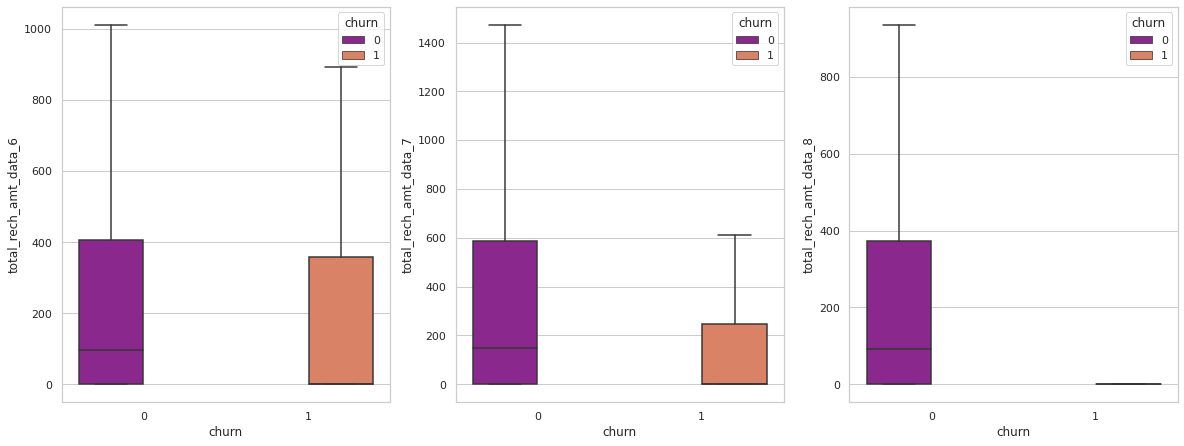

In [51]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech_amt_data')

<span style='color:green'>**Analysis:** We can see that there is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers.

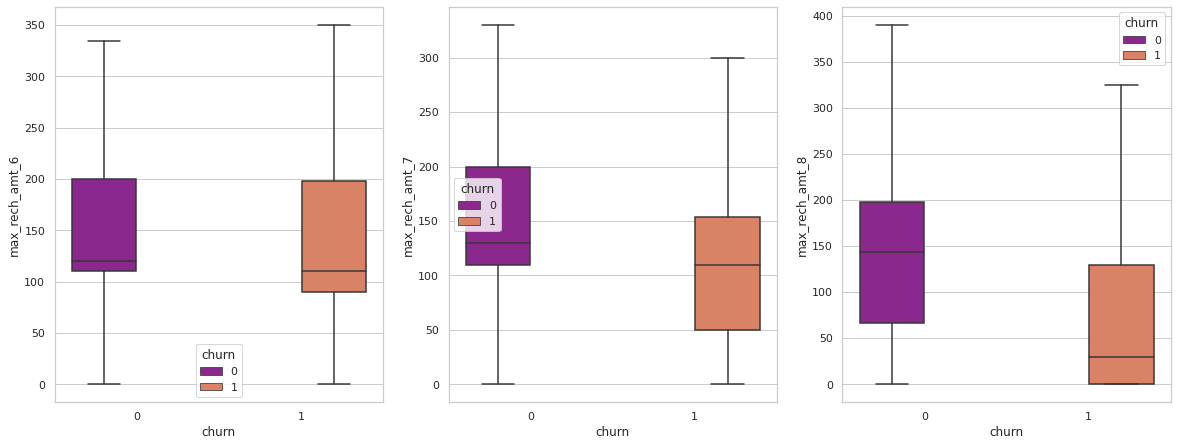

In [52]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

<span style='color:green'>**Analysis:** We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

In [53]:
# Let's check other recharge related variables:
other_recharge = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [54]:
# lets check the % of NA values for other recharge related variables
100*telecom_df_high_val_cust.loc[:,other_recharge].isnull().sum()/len(telecom_df_high_val_cust)

total_rech_num_6                   0.00
total_rech_num_7                   0.00
total_rech_num_8                   0.00
max_rech_data_6                   44.11
max_rech_data_7                   43.12
max_rech_data_8                   46.80
dtype: float64

In [55]:
telecom_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,"16,740.00","17,038.00","15,935.00"
mean,139.80,140.44,136.35
std,118.89,120.30,119.57
min,1.00,1.00,1.00
25%,25.00,25.00,25.00
50%,152.00,152.00,152.00
75%,198.00,198.00,198.00
max,"1,555.00","1,555.00","1,555.00"


<span style='color:green'>**Analysis:** We see that the minimum value is 1 while the max is 1555 across months, which indicate the missing values are where no recharges happened for the data, Filling the missing values by 0 , means no recharge.

In [56]:
telecom_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= telecom_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

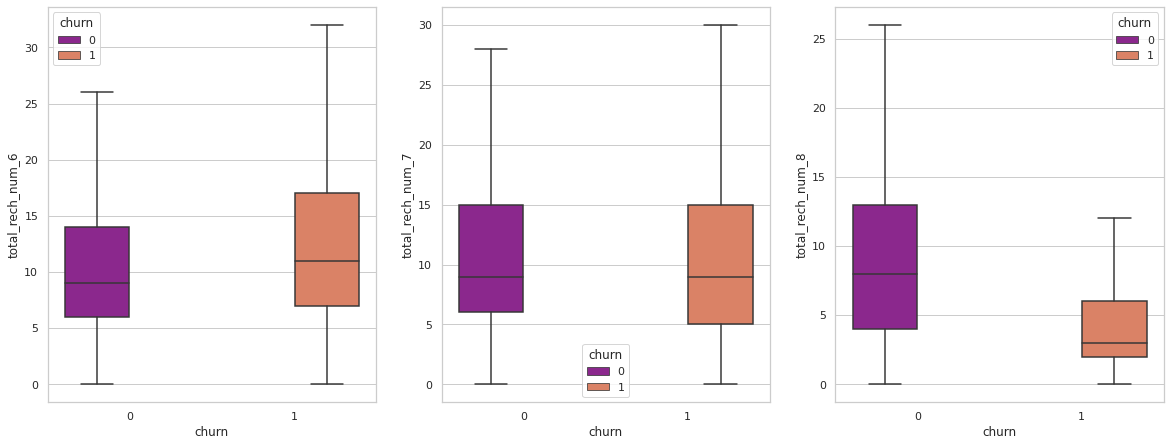

In [57]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

<span style='color:green'>**Analysis:** We can see that there is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.

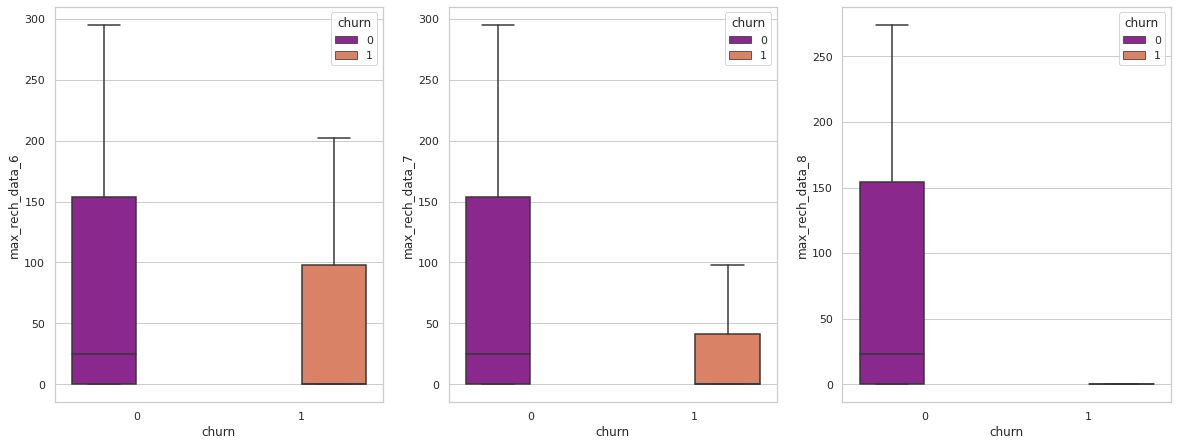

In [58]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

<span style='color:green'>**Analysis:** We can see that there is a huge drop in maximum recharge for data also in the 8th month (action phase) for churned customers.

In [59]:
#Getting the last day recharge amount columns
last_day_rech_amt = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('day')]

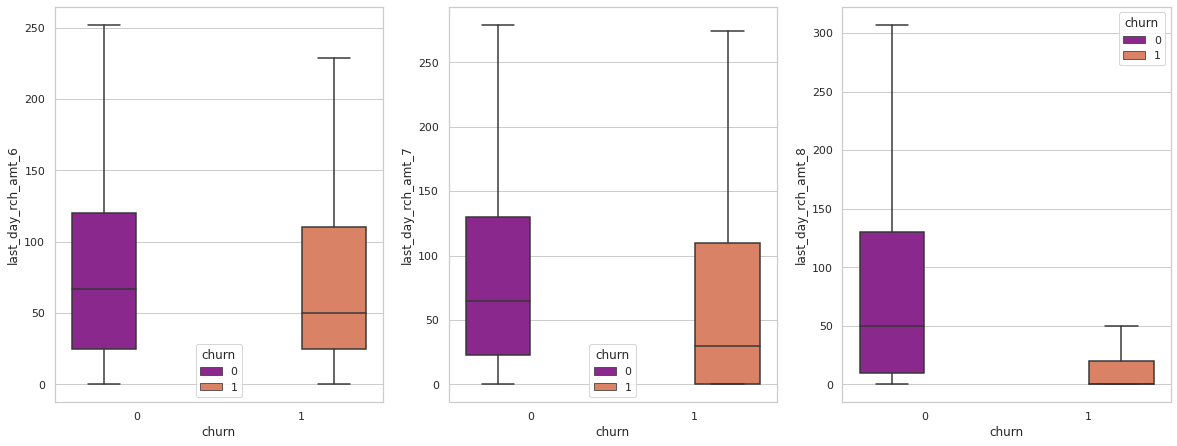

In [60]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

<span style='color:green'>**Analysis:** We are getting a huge drop in 8th month recharge amount for churned customers.

#### b. 2G and 3G usage related attributes

In [61]:
usage_2g_and_3g = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('2g|3g',regex=True)]

In [62]:
#let us check the % of NA values present
percentage_3g_2g_null_check = 100*telecom_df_high_val_cust.loc[:,usage_2g_and_3g].isnull().sum()/len(telecom_df_high_val_cust.loc[:,usage_2g_and_3g])
df = pd.DataFrame(percentage_3g_2g_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage).style.applymap(color_red)
display(df)

,Null_Percentage
count_rech_2g_6,44.112443
count_rech_2g_7,43.117551
count_rech_2g_8,46.799987
count_rech_3g_6,44.112443
count_rech_3g_7,43.117551
count_rech_3g_8,46.799987
vol_2g_mb_6,0.000000
vol_2g_mb_7,0.000000
vol_2g_mb_8,0.000000
vol_3g_mb_6,0.000000


<span style='color:green'>**Analysis:** We are getting more then 40% values are not available for count of recharge and average revenue for 2G/3G per user. 
Although we have 2G/3G volume usage based data available, we can drop these columns.

In [63]:
telecom_df_high_val_cust.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

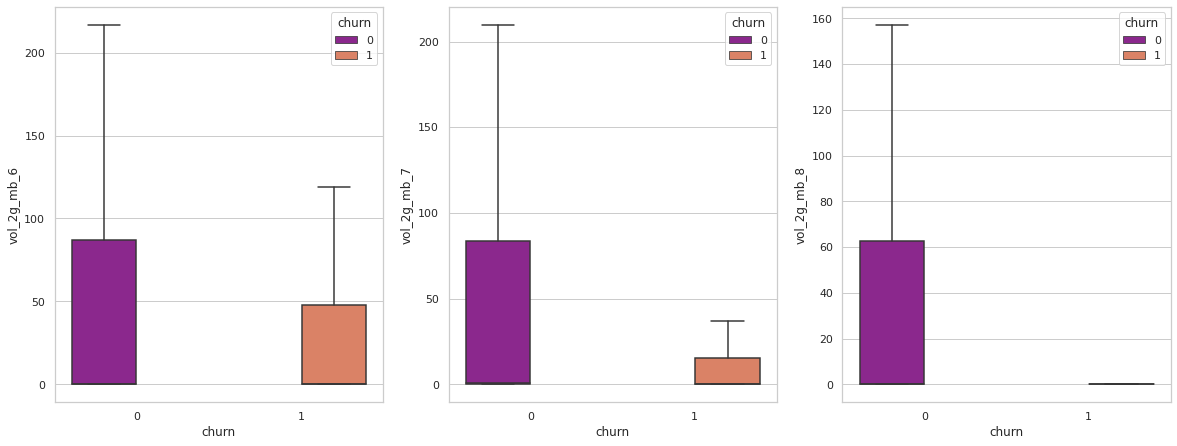

In [64]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

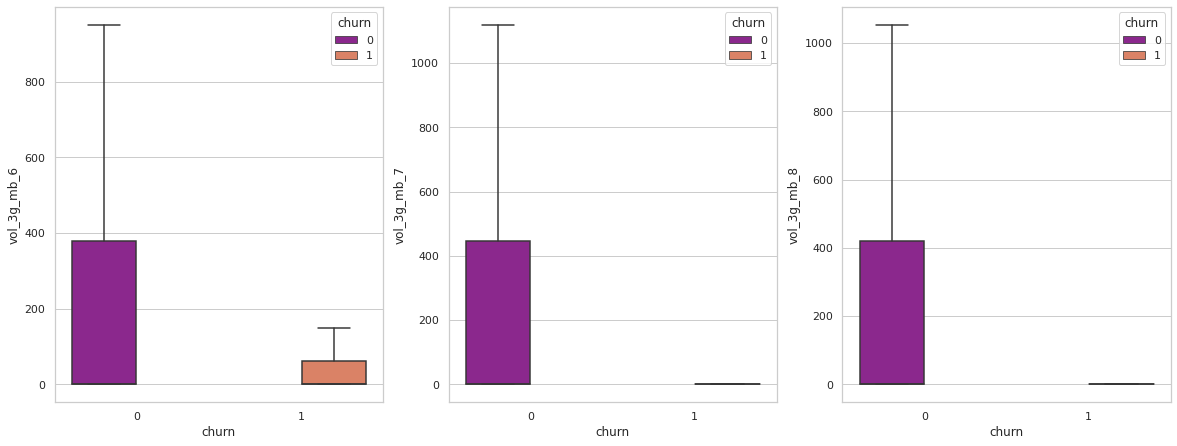

In [65]:
plot_box_chart('vol_3g_mb')

<span style='color:green'>**Analysis:** We have two observations from above: <br> 1) 2G and 3G usage for churned customers drops in 8th month<br>
2) We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.</span>

In [66]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [67]:
telecom_df_high_val_cust[monthly_subcription_2g_3g].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   monthly_2g_6  29953 non-null  int64
 1   monthly_2g_7  29953 non-null  int64
 2   monthly_2g_8  29953 non-null  int64
 3   monthly_3g_6  29953 non-null  int64
 4   monthly_3g_7  29953 non-null  int64
 5   monthly_3g_8  29953 non-null  int64
dtypes: int64(6)
memory usage: 2.8 MB


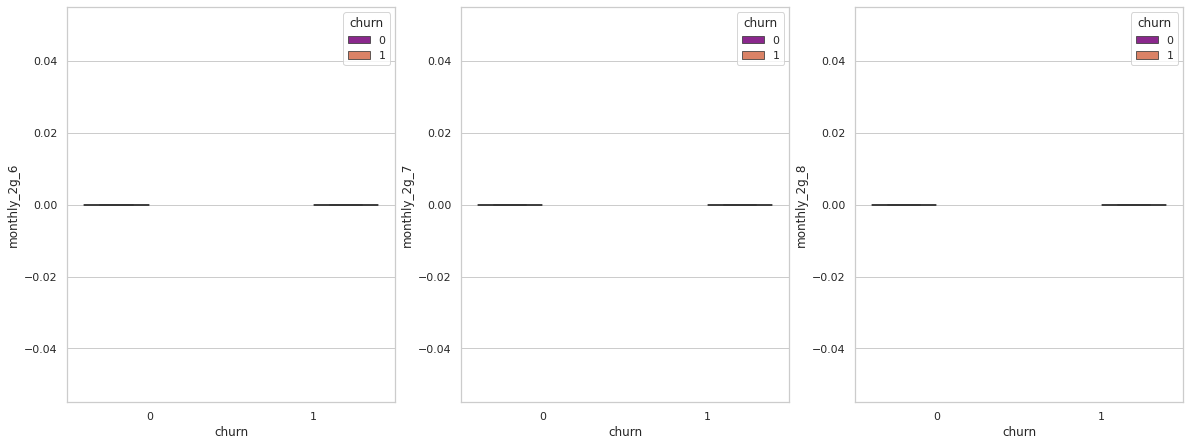

In [68]:
# Ploting for monthly subscription :
plot_box_chart('monthly_2g')

<span style='color:green'>**Analysis:** Value range is very low, hence graph is not giving us proper justification result .Hence doing analysis by checking mean value.

In [69]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

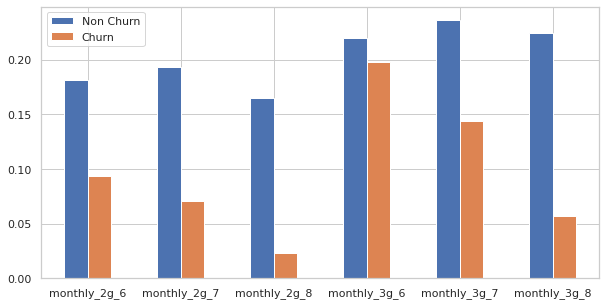

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.18,0.19,0.17,0.22,0.24,0.22
Churn,0.09,0.07,0.02,0.20,0.14,0.06


In [70]:
plot_mean_bar_chart(telecom_df_high_val_cust, monthly_subcription_2g_3g)

<span style='color:green'>**Analysis:** Again we can see a drop in monthly subscription for churned customers in 8th Month.

In [71]:
# let's check Volume based cost 
vbc_column = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [72]:
# Renaming month named vbc columns to 6,7,8,9 format
telecom_df_high_val_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
telecom_df_high_val_cust.drop('vbc_3g_9',axis=1,inplace=True)

In [73]:
vbc_column = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

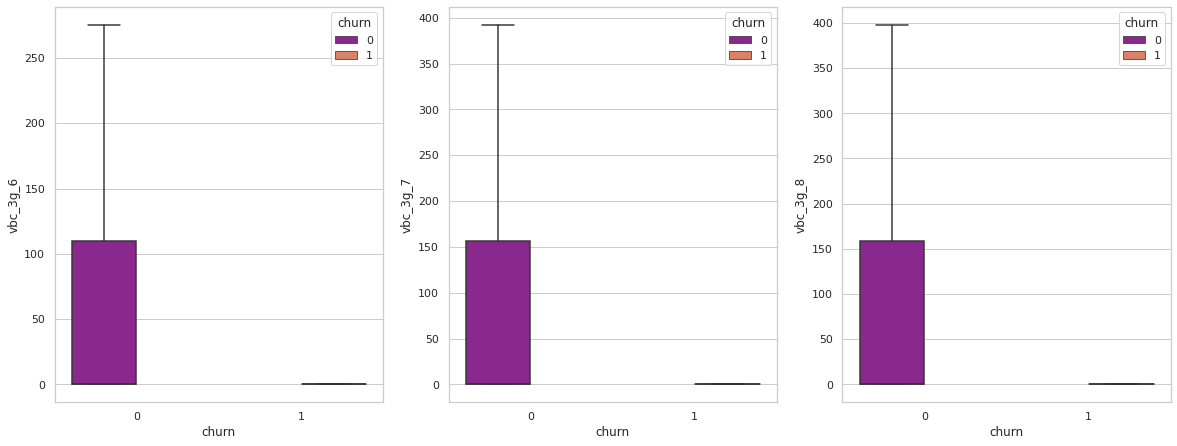

In [74]:
# Ploting for volume based cost :
plot_box_chart('vbc_3g')

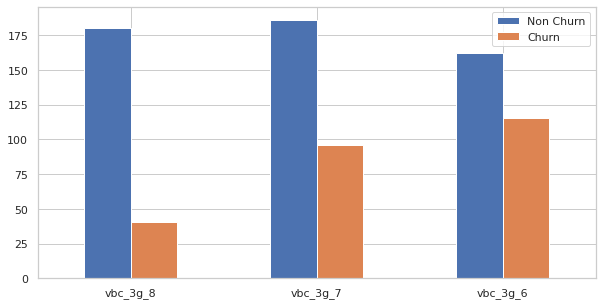

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,180.62,186.37,162.56
Churn,40.94,96.34,115.46


In [75]:
plot_mean_bar_chart(telecom_df_high_val_cust, vbc_column)

<span style='color:green'>**Analysis:** Significantly it showing that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month

In [76]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('sachet_2g|sachet_3g',regex=True)]


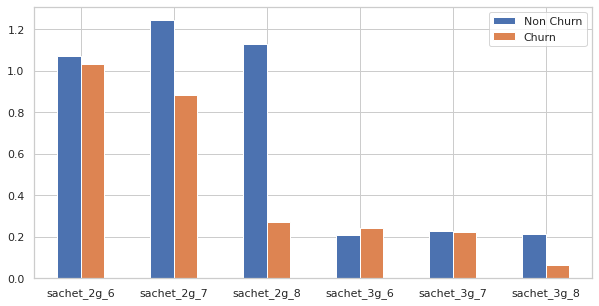

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.07,1.25,1.13,0.21,0.23,0.21
Churn,1.03,0.88,0.27,0.24,0.22,0.07


In [77]:
plot_mean_bar_chart(telecom_df_high_val_cust, SC_2g_or_3g_col)

<span style='color:green'>**Analysis:** We can see the drop in sachet services in 8th month for churned cutsomers

#### c. Average Revenue Per User

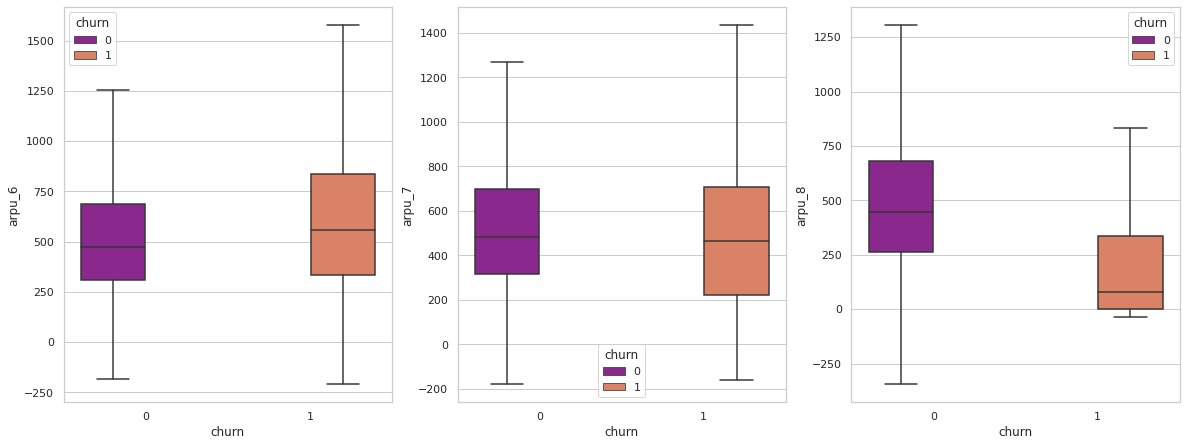

In [78]:
# Checking columns for average revenue per user
arpu_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('arpu_')]

# Plotting arpu
plot_box_chart('arpu')

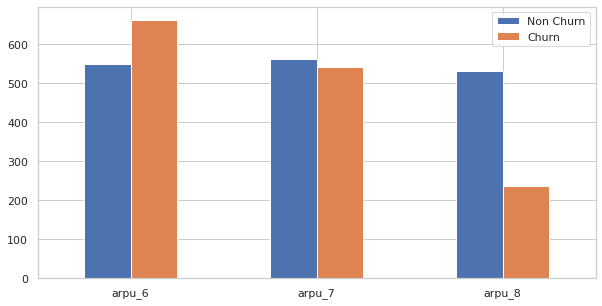

,arpu_6,arpu_7,arpu_8
Non Churn,549.55,562.93,532.87
Churn,663.71,541.15,237.66


In [79]:
plot_mean_bar_chart(telecom_df_high_val_cust, arpu_cols)

<span style='color:green'>**Analysis:** We can see that huge drops for Arpu in 8th month for churned customers

#### d. Minutes of usage - voice calls

In [80]:
mou_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('mou')]

In [81]:

mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [82]:
meta_df = getMetadata(telecom_df_high_val_cust[mou_cols])
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
isd_ic_mou_8,3.91
loc_ic_t2t_mou_8,3.91
loc_ic_t2m_mou_8,3.91
std_og_t2t_mou_8,3.91
loc_og_t2c_mou_8,3.91
loc_ic_t2f_mou_8,3.91
loc_og_t2f_mou_8,3.91
loc_ic_mou_8,3.91
std_og_mou_8,3.91
loc_og_t2m_mou_8,3.91


<span style='color:green'>**Analysis:** So for all minutes of usage columns the maximum missing % is 3.91 , means in these case the customer has not been used at all for that particular call type, thus we can fill the missing values with zero

In [83]:
# replaceing null values by 0 for minutes of usage variables
telecom_df_high_val_cust.loc[:,mou_cols] = telecom_df_high_val_cust.loc[:,mou_cols].replace(np.NaN,0)

In [84]:
mou_og_cols6 = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [85]:
telecom_df_high_val_cust.loc[:,mou_og_cols6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,"29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00"
mean,26.60,84.57,163.31,6.35,1.58,254.24,165.90,179.44,1.81,347.15,2.17,5.83,610.06
std,116.27,228.96,250.22,22.14,6.31,378.55,403.99,409.14,11.99,608.85,45.89,17.58,691.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,4.38,19.21,0.00,0.00,32.26,0.00,0.00,0.00,0.40,0.00,0.00,116.64
50%,0.00,24.36,77.26,0.00,0.00,124.59,2.71,16.36,0.00,45.08,0.00,0.23,410.63
75%,0.00,78.06,209.03,4.23,0.00,332.31,109.56,154.54,0.00,465.29,0.00,5.21,859.03
max,"3,775.11","6,431.33","4,729.74","1,466.03",271.44,"10,643.38","7,366.58","8,314.76",628.56,"8,432.99","5,900.66","1,023.21","10,674.03"


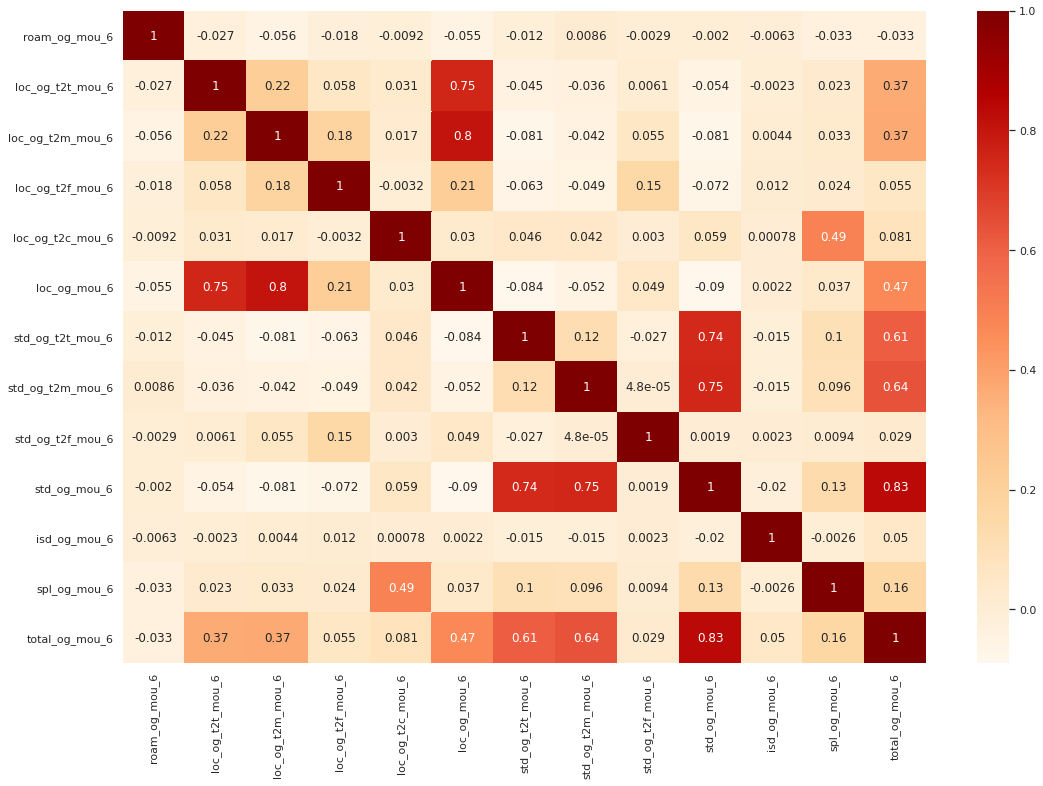

In [86]:
heatmap(18,12,telecom_df_high_val_cust.filter(mou_og_cols6))

<span style='color:green'>**Analysis:** We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.

In [87]:
list_total_og_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
telecom_df_high_val_cust.drop(list_total_og_cols,axis=1,inplace=True)
print("Columns dropped - ")
list_total_og_cols.tolist()

Columns dropped - 


['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

#### e. Checking for incoming mou variables

In [88]:
mou_ic_cols6 = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]

In [89]:
telecom_df_high_val_cust.loc[:,mou_ic_cols6].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,"29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00"
mean,16.12,65.51,150.47,15.29,231.28,14.90,29.21,2.70,46.81,290.12,0.06,10.80
std,76.34,163.86,219.32,45.79,315.01,77.75,98.28,19.11,137.60,365.74,0.19,76.79
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,6.10,28.09,0.00,47.91,0.00,0.00,0.00,1.03,72.89,0.00,0.00
50%,0.00,25.08,84.11,1.84,134.56,0.38,5.00,0.00,11.41,183.78,0.00,0.00
75%,0.00,67.48,188.74,11.98,297.26,8.19,23.63,0.11,41.49,372.16,0.00,0.00
max,"2,613.31","6,351.44","4,693.86","1,678.41","7,454.63","5,459.56","4,630.23","1,351.11","5,459.63","7,716.14",19.76,"6,789.41"


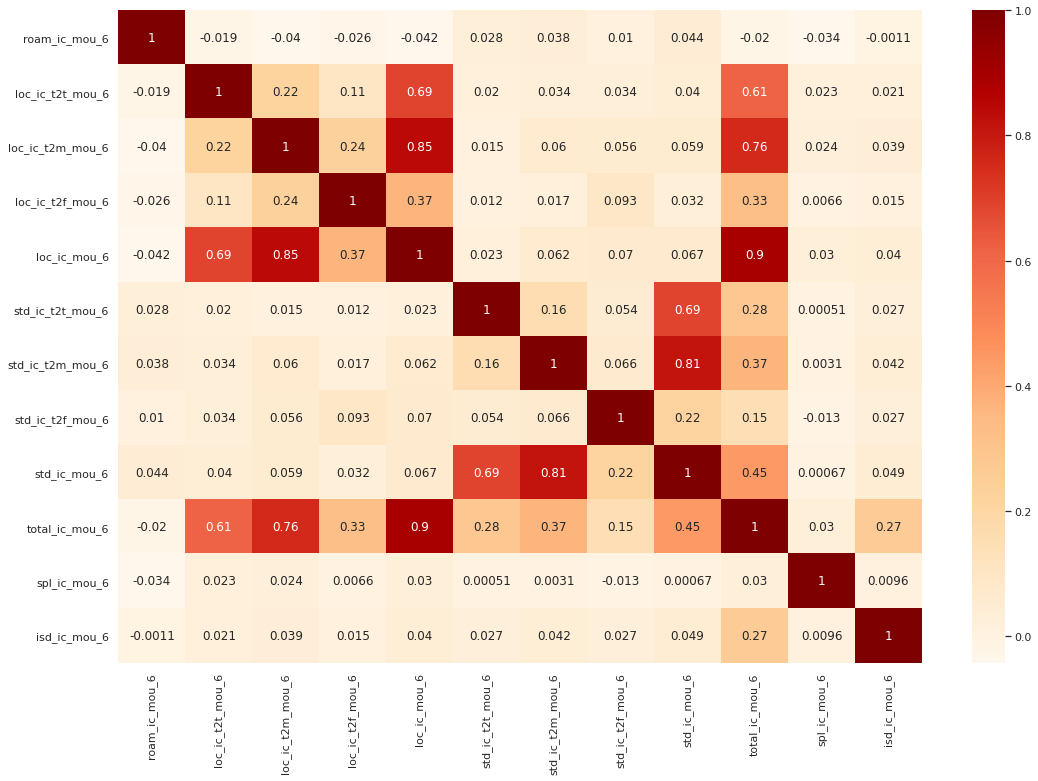

In [90]:
heatmap(18,12,telecom_df_high_val_cust.filter(mou_ic_cols6))

<span style='color:green'>**Analysis:** We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.

In [91]:
list_total_ic_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
telecom_df_high_val_cust.drop(list_total_ic_cols,axis=1,inplace=True)
print("Columns dropped - ")
list_total_ic_cols.tolist()

Columns dropped - 


['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

#### f. Offnet Usage

In [92]:
offnet_usage_service_col = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('offnet.*mou',regex=True)]

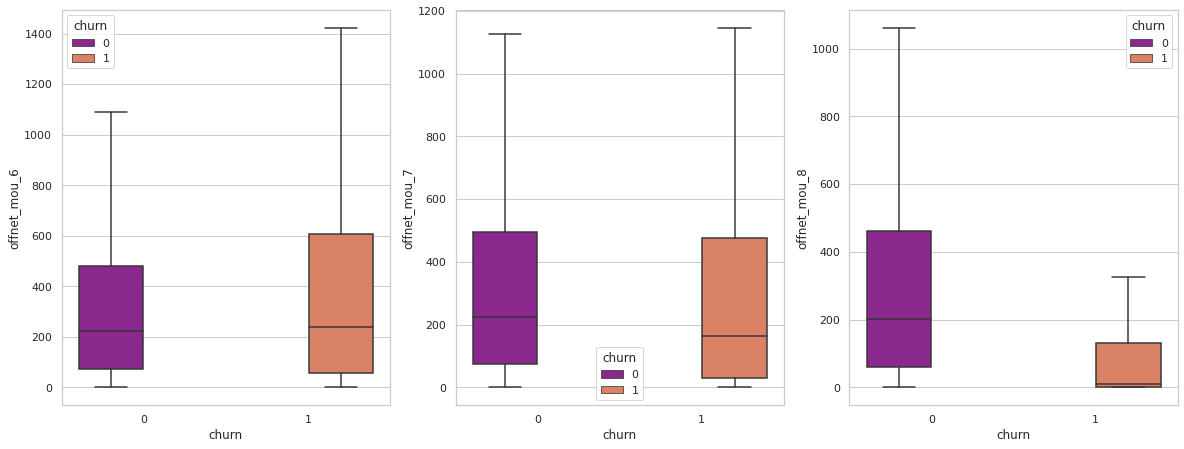

In [93]:
# Offnet mou values for churned and non churned customers
plot_box_chart('offnet_mou')

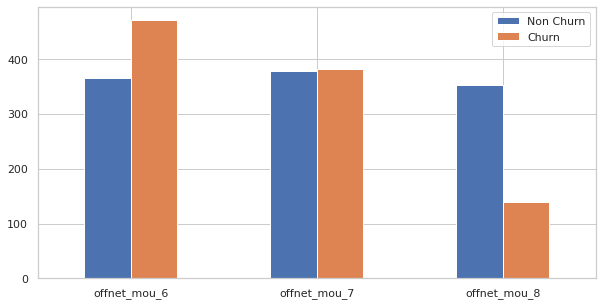

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,365.12,377.88,352.50
Churn,471.95,382.28,138.52


In [94]:
plot_mean_bar_chart(telecom_df_high_val_cust, offnet_usage_service_col)

<span style='color:green'>**Analysis:** We can see the drop for offnet mou services in the 8th month

#### f. ONNET : All kind of calls within the same operator network

In [95]:
#minutes of usage related columns
onnet_usage_service =  telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('^onnet.*mou',regex=True)]

In [96]:
onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

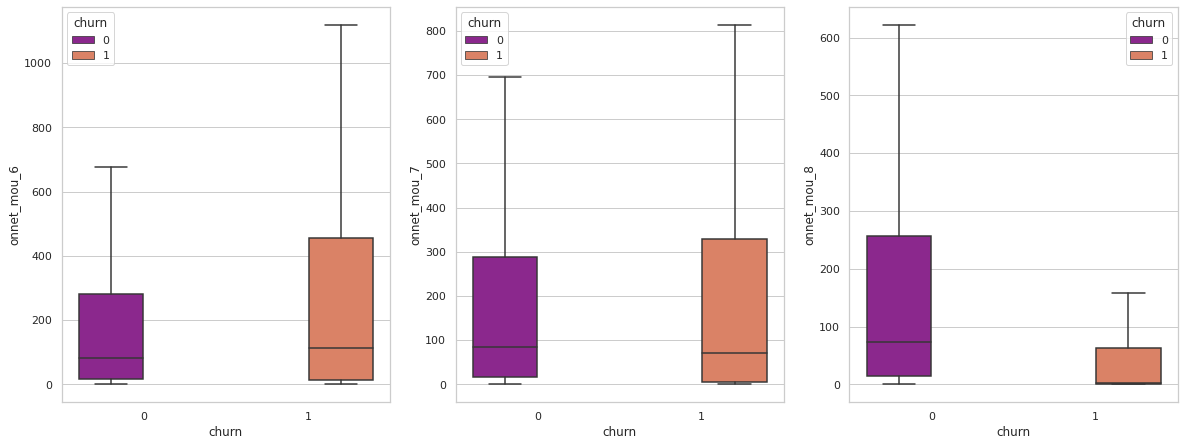

In [97]:
# Plotting offnet
plot_box_chart('onnet_mou')

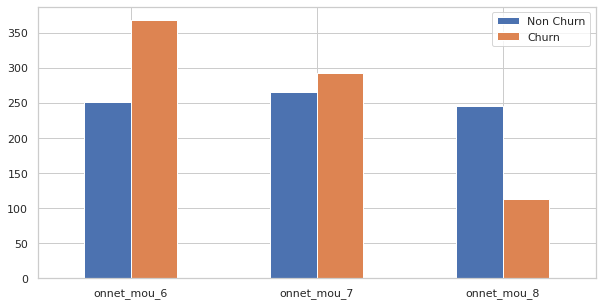

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,251.37,265.86,245.03
Churn,368.66,292.85,113.48


In [98]:
plot_mean_bar_chart(telecom_df_high_val_cust, onnet_usage_service)

<span style='color:green'>**Analysis:** We also see that there is a drop in Onnet usage in the 8th month for churned customers

#### g. Tenure Analysis for Customers

In [99]:
tenure_data = telecom_df_high_val_cust.copy()

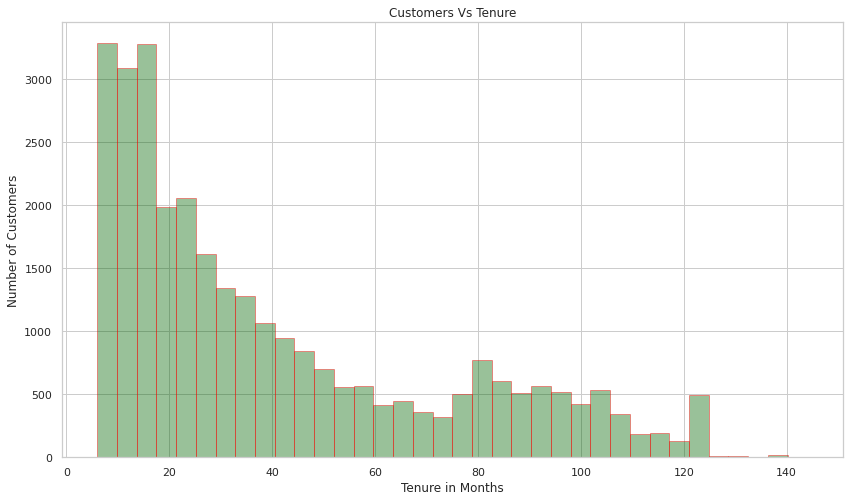

In [100]:
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [101]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

0     2-5 Yrs    
7     2-5 Yrs    
8     6-12 Months
21    1-2 Yrs    
23    1-2 Yrs    
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

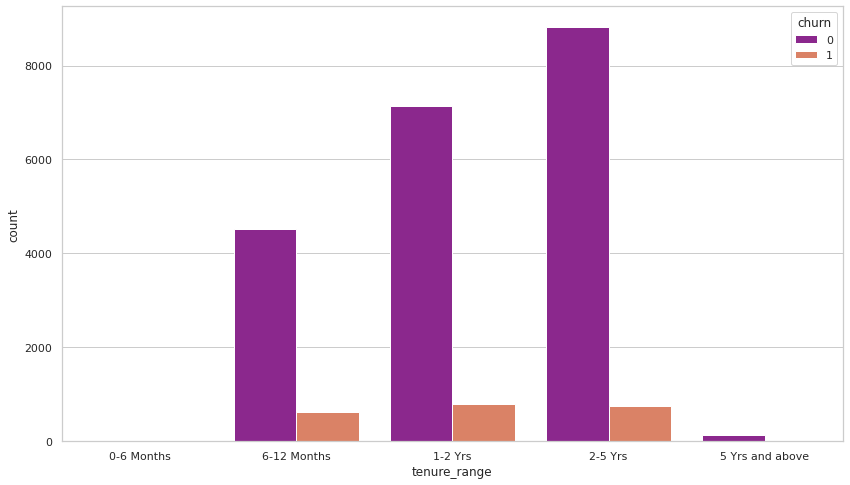

In [102]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()

#### h. Checking columns with more than 30% NA values.

In [103]:
meta_df = getMetadata(telecom_df_high_val_cust)
meta_df = meta_df[meta_df["Null_Percentage"] > 30]
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
date_of_last_rech_data_8,46.80
night_pck_user_8,46.80
fb_user_8,46.80
date_of_last_rech_data_6,44.11
night_pck_user_6,44.11
fb_user_6,44.11
date_of_last_rech_data_7,43.12
night_pck_user_7,43.12
fb_user_7,43.12


In [104]:
#Dropping 30% column
is_more_30 = meta_df.index
telecom_df_high_val_cust.drop(telecom_df_high_val_cust[is_more_30],axis=1,inplace=True)

In [105]:
telecom_df_high_val_cust.shape

(29953, 124)

#### i. Replacing NAN values

In [106]:
meta_df = getMetadata(telecom_df_high_val_cust)
meta_df = meta_df[meta_df["Null_Percentage"] > 0]
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
og_others_8,3.91
ic_others_8,3.91
date_of_last_rech_8,1.94
og_others_6,1.81
ic_others_6,1.81
og_others_7,1.79
ic_others_7,1.79
date_of_last_rech_7,0.33
date_of_last_rech_6,0.24


In [107]:
telecom_df_high_val_cust[meta_df.index].head(3)

,og_others_8,ic_others_8,date_of_last_rech_8,og_others_6,ic_others_6,og_others_7,ic_others_7,date_of_last_rech_7,date_of_last_rech_6
0,0.00,0.00,2014-08-08,nan,nan,nan,nan,2014-07-16,2014-06-21
7,0.00,15.14,2014-08-26,0.00,15.74,0.00,15.19,2014-07-25,2014-06-27
8,0.00,0.00,2014-08-30,0.00,0.00,0.00,0.00,2014-07-31,2014-06-25


In [108]:
numberic_col = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

In [109]:
for i in numberic_col:
    telecom_df_high_val_cust.loc[telecom_df_high_val_cust[i].isnull(),i]=0

In [110]:
telecom_df_high_val_cust[meta_df.index].head(3)

,og_others_8,ic_others_8,date_of_last_rech_8,og_others_6,ic_others_6,og_others_7,ic_others_7,date_of_last_rech_7,date_of_last_rech_6
0,0.00,0.00,2014-08-08,0.00,0.00,0.00,0.00,2014-07-16,2014-06-21
7,0.00,15.14,2014-08-26,0.00,15.74,0.00,15.19,2014-07-25,2014-06-27
8,0.00,0.00,2014-08-30,0.00,0.00,0.00,0.00,2014-07-31,2014-06-25


In [111]:
meta_df = getMetadata(telecom_df_high_val_cust)
meta_df = meta_df[meta_df["Null_Percentage"] > 0]
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
date_of_last_rech_8,1.94
date_of_last_rech_7,0.33
date_of_last_rech_6,0.24


### 3. Derive new features.

In [112]:
telecom_df_final = telecom_df_high_val_cust.copy()
print(telecom_df_final.shape)
telecom_df_final.head(3)

(29953, 124)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,197.38,214.82,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.00,1.00,1.00,252.00,252.00,252.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.00,252.00,252.00,559.00,1
7,7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,0.00,"1,185.00",1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,354.00,207.00,696.00,0


In [113]:
telecom_df_final.drop(["total_avg_rech_amnt_6_7_GPhase"],axis=1,inplace=True)
telecom_df_final.drop(telecom_df_high_val_cust.filter(regex='date_').columns,axis=1,inplace=True)
print (telecom_df_final.shape)

col_list = telecom_df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_df_final[avg_col_name] = (telecom_df_final[col_6]  + telecom_df_final[col_7])/ 2

(29953, 120)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [114]:
col_list_to_drop = telecom_df_final.filter(regex='_6|_7')
telecom_df_final.drop(col_list_to_drop,axis=1,inplace=True)
print (telecom_df_final.shape)

(29953, 81)


In [115]:
telecom_df_final.head(3)

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,7000842753,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,1.00,252.00,252.00,5.75,109.61,0,0,1,0,968,30.40,252.00,1,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,307.00,252.00,252.00,1.00,252.00,252.00,15.72,117.16,0.00,0.00,1.00,0.00,50.60,252.00
7,7000701601,"3,171.48",52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.00,27.31,121.19,39.53,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,0.00,1,"1,209.51",56.26,510.29,24.86,18.16,41.38,378.00,58.64,0.00,13.79,40.83,13.37,0.09,2.25,0.00,45.20,219.53,126.81,24.36,109.22,43.22,0.10,8.29,15.46,5.00,"1,185.00","1,185.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,0.00
8,7001524846,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.00,0.31,15.48,0.00,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,3.00,23.00,69.00,0.03,11.94,0,3,0,0,315,21.03,207.00,0,435.47,382.36,87.64,0.00,0.00,257.36,75.77,0.00,0.00,125.00,11.86,0.00,0.00,0.00,0.00,16.84,35.78,0.00,0.29,13.25,0.00,0.00,0.00,0.00,20.00,519.00,122.00,25.00,1.00,77.00,88.50,178.00,375.48,0.50,0.50,0.00,0.00,516.40,177.00


<span style='color:green'>**Analysis:** We have merged most of the columns related to month 6 & 7 so to reduce the number of features. By doing this apporach we have reduced the fetures from 124 to 81.  

## Modelling

### 1. PCA : Principal Component Analysis

In [116]:
telecom_pca_df = telecom_df_final.copy()

In [117]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

def split_data(df):
    Y = df["churn"]
    X = df.drop(["churn","mobile_number"],axis=1)
    return X,Y
    
def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    display("Scaling the data ....")
    return X_scale_final

def get_scree_plot(X):
#    pca = PCA(svd_solver='randomized', random_state=100)
    pca = PCA(0.95)
    X_PCA=pca.fit_transform(X)
    display(X_PCA.shape)
    fig = plt.figure(figsize = (8,6))
    plt.vlines(x=49, ymax=1, ymin=0, colors="r", linestyles="--")
    plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")    
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    return pca
    
def resampling_data(X,Y,feature_number,train_size=0.7,test_size=0.3) :
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=42)

    display("Shape of train datatset before : "+str(x_train.shape))
    display("Percenatge of Churned customer data : "+str(round(100*Y.sum()/len(Y),2)))
    display("Applying SMOTE to normalize imbalance ....")

    #Initializing SMOTE: Synthetic Minority Over-sampling Technique
    # using this as data is skewed 
    smote = SMOTE(random_state=42)
    x_tr,y_tr = smote.fit_resample(x_train,y_train)
    display("Shape of train datatset after SMOTE : "+str(x_tr.shape))

    # Applying PCA : Pricnipal Component Analysis
    pca = IncrementalPCA(n_components=feature_number)    
    x_tr_pca = pca.fit_transform(x_tr)
    x_test_pca = pca.transform(x_test)
    display("Shape of train datatset after PCA : "+str(x_tr_pca.shape))

    return x_tr_pca,x_test_pca,y_tr,y_test

In [118]:
X,Y=split_data(telecom_pca_df)

### 2. Percentage distribution of churn/non-churn cutomer data

In [119]:
display("Percenatge of Churned Customer data : "+str(round(100*Y.sum()/len(Y),2)))

'Percenatge of Churned Customer data : 8.12'

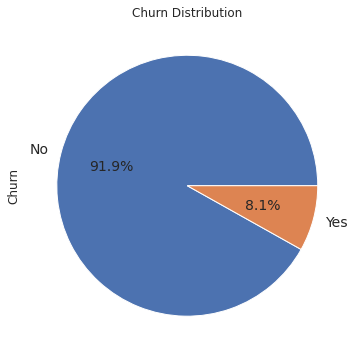

In [120]:
#Churn Distribution
pie_chart = telecom_pca_df['churn'].value_counts()*100.0 /len(telecom_pca_df)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

### 3. Scaling the data so as to normalize all the fields

In [121]:
X_scaled = scale_data(X)
print(X_scaled.shape)
X_scaled.head(5)

'Scaling the data ....'

(29953, 79)


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,-0.59,-0.51,-0.70,-0.17,-0.19,-0.34,-0.65,-0.30,-0.24,-0.37,-0.38,-0.15,-0.04,-0.32,-0.02,-0.39,-0.66,-0.31,-0.19,-0.27,-0.13,-0.24,-0.16,-0.10,-0.86,-0.54,0.53,1.10,-0.21,1.62,0.66,-0.32,-0.26,-0.38,-0.42,1.28,-0.18,-0.25,-0.33,-0.13,-0.82,-0.60,-0.82,-0.22,-0.25,-0.38,-0.70,-0.30,-0.27,-0.44,-0.47,-0.16,-0.05,-0.37,-0.14,-0.42,-0.73,-0.35,-0.20,-0.32,-0.15,-0.27,-0.15,-0.10,-0.96,-0.69,0.53,1.30,-0.28,1.68,0.64,-0.37,-0.29,-0.46,-0.47,1.36,-0.23,-0.30,-0.19
1,5.30,-0.40,-0.02,0.26,0.17,-0.17,0.04,2.43,-0.24,-0.34,-0.26,1.38,0.18,-0.00,-0.02,-0.22,-0.12,0.58,0.23,1.10,0.99,-0.24,0.29,1.09,-0.32,4.99,8.19,4.73,-0.54,-0.66,-0.62,-0.34,-0.38,-0.38,-0.42,-0.34,-0.18,-0.43,-0.26,-0.29,1.51,-0.47,0.29,0.16,-0.06,-0.20,0.92,2.49,-0.27,-0.41,-0.36,1.00,-0.05,-0.24,-0.14,-0.13,0.33,2.50,0.12,0.84,2.26,0.43,-0.04,1.03,-0.79,1.02,6.57,-0.87,-0.65,-0.77,-0.74,-0.42,-0.43,-0.46,-0.47,-0.39,-0.23,-0.38,-0.40
2,-0.74,-0.43,-0.41,-0.17,-0.19,-0.29,-0.43,-0.30,0.76,-0.32,-0.20,-0.15,-0.04,0.18,-0.02,-0.39,-0.61,-0.33,-0.19,-0.26,-0.13,-0.24,-0.16,-0.10,0.43,-0.76,-0.75,-0.57,0.46,-0.45,-0.27,-0.34,-0.37,-0.38,0.77,-0.34,-0.18,-0.93,-0.35,-0.16,-0.29,0.27,-0.63,-0.22,-0.25,0.77,-0.38,-0.30,-0.27,-0.12,-0.44,-0.16,-0.05,-0.37,-0.14,-0.31,-0.56,-0.35,-0.20,-0.18,-0.15,-0.27,-0.15,-0.10,0.95,-0.28,-0.32,-0.65,-0.28,-0.02,-0.26,0.17,0.02,0.83,-0.27,-0.39,-0.23,0.88,-0.25
3,0.26,-0.33,1.35,-0.17,-0.19,-0.24,-0.20,-0.22,-0.24,-0.22,1.76,-0.15,-0.04,-0.32,-0.02,-0.27,-0.08,-0.09,-0.19,0.71,-0.13,-0.24,-0.16,-0.10,1.84,0.22,-0.64,-0.29,-0.54,-0.66,-0.62,-0.34,-0.38,-0.38,-0.42,-0.34,-0.18,-0.51,-0.40,-0.29,-0.01,-0.33,0.99,-0.22,-0.25,-0.36,-0.32,-0.29,-0.27,-0.15,1.40,-0.16,-0.05,-0.37,-0.14,-0.38,-0.26,-0.27,-0.07,0.24,-0.15,-0.27,-0.15,-0.10,1.41,-0.04,-0.78,-0.65,-0.65,-0.77,-0.74,-0.42,-0.43,-0.46,-0.47,-0.39,-0.23,-0.43,-0.40
4,-0.28,-0.44,-0.27,-0.17,-0.19,-0.20,-0.01,-0.30,2.24,-0.37,-0.29,-0.15,-0.04,0.55,-0.02,0.09,0.00,-0.32,-0.01,0.15,-0.13,-0.24,-0.10,0.93,-0.64,-0.24,0.11,-0.64,0.13,0.96,0.76,-0.34,0.72,-0.38,-0.42,1.28,0.72,-0.63,-0.31,0.05,-0.99,-0.49,-0.63,-0.22,-0.25,-0.16,-0.35,-0.30,-0.27,-0.44,-0.46,-0.16,-0.05,-0.37,-0.14,-0.16,-0.22,-0.35,-0.20,-0.23,-0.15,-0.27,0.04,0.10,-0.90,-0.84,-0.53,-0.10,-0.28,0.10,0.23,-0.42,-0.07,-0.46,-0.47,1.36,-0.23,-0.36,-0.11


(29953, 49)

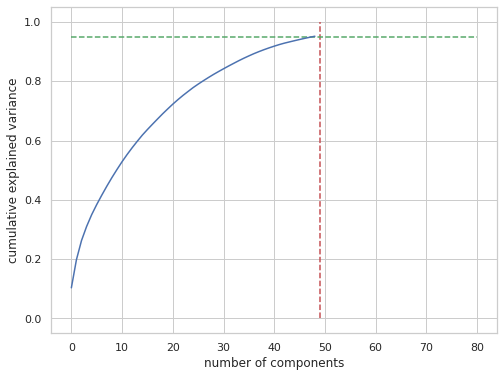

,PC1,PC2,PC3,Feature
0,0.00,0.29,0.15,arpu_8
1,-0.11,0.11,0.15,onnet_mou_8
2,-0.10,0.20,0.11,offnet_mou_8
3,-0.01,0.05,0.01,roam_ic_mou_8
4,-0.02,0.07,0.03,roam_og_mou_8
5,-0.03,0.10,0.02,loc_og_t2t_mou_8
6,-0.03,0.18,-0.03,loc_og_t2m_mou_8
7,0.01,0.11,-0.09,loc_og_t2f_mou_8
8,-0.01,0.02,0.08,loc_og_t2c_mou_8
9,-0.11,0.07,0.16,std_og_t2t_mou_8


In [122]:
pca = get_scree_plot(X_scaled) # scree plot
col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

In [123]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([10.34, 19.83, 26.28, 31.01, 34.99, 38.42, 41.6 , 44.64, 47.53,
       50.26, 52.88, 55.32, 57.61, 59.77, 61.85, 63.73, 65.53, 67.3 ,
       69.04, 70.69, 72.3 , 73.81, 75.24, 76.57, 77.88, 79.06, 80.18,
       81.26, 82.3 , 83.28, 84.23, 85.16, 86.06, 86.95, 87.79, 88.58,
       89.34, 90.04, 90.69, 91.3 , 91.86, 92.4 , 92.88, 93.3 , 93.71,
       94.11, 94.5 , 94.86, 95.2 ])

<span style='color:green'>**Analysis:** Looks like 49 components are enough to describe 95% of the variance in the dataset.We'll choose **49** components for our modeling

In [124]:
X_train, X_test, y_train, y_test = resampling_data(X_scaled,Y,49)

'Shape of train datatset before : (20967, 79)'

'Percenatge of Churned customer data : 8.12'

'Applying SMOTE to normalize imbalance ....'

'Shape of train datatset after SMOTE : (38544, 79)'

'Shape of train datatset after PCA : (38544, 49)'

In [125]:
X_train.shape

(38544, 49)

<span style='color:green'>**Analysis:** SMOTE bloated the dataset and balanced it by adding skewed data values.

## Model Building & Evaluation

### 1. Logistic Regression

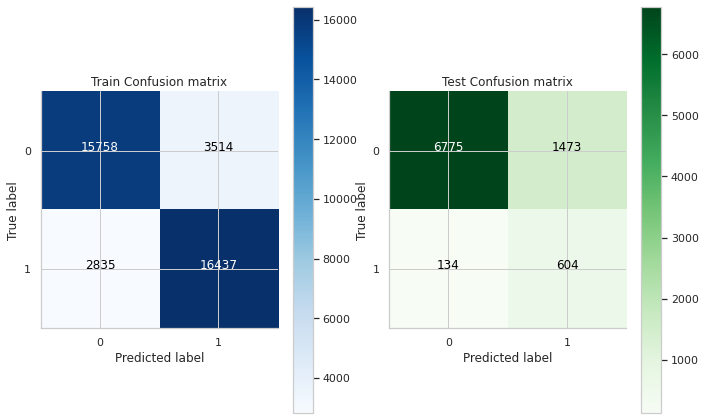

In [126]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
lm_metric=prediction_matrix(lm,X_train,X_test,y_train,y_test)

### 2. Logistics Regression with L2 Regularisation

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Time taken to predict train and test 50.515374183654785 sec


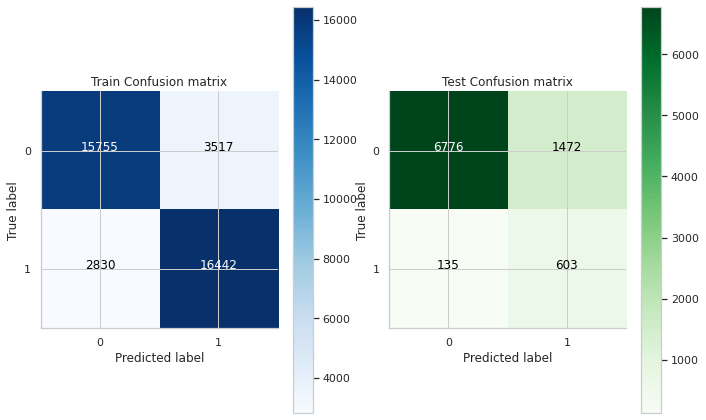

In [127]:
begin = time.time()
solvers = [ 'liblinear','saga']
penalty = ['l2']
c_values = [2000,1000,600]
# define grid search
params = dict(solver=solvers,penalty=penalty,C=c_values)
#folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
folds=5
estimator = LogisticRegression()
model_cv = GridSearchCV(estimator = estimator, 
                        param_grid = params, 
                        scoring= 'accuracy',  
                        cv = folds, 
                        n_jobs=-1
                        )            
model_cv.fit(X_train, y_train)
display(model_cv.best_estimator_)
ridge=model_cv.best_estimator_
ridge.fit(X_train, y_train) 
lm_ridge_metric=prediction_matrix(ridge,X_train,X_test,y_train,y_test)
end = time.time()
time_taken=end-begin
print('Time taken to predict train and test {} sec'.format(time_taken))

### 3. Logistics Regression with L1 Regularisation

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Time taken to predict train and test 82.79944467544556 sec


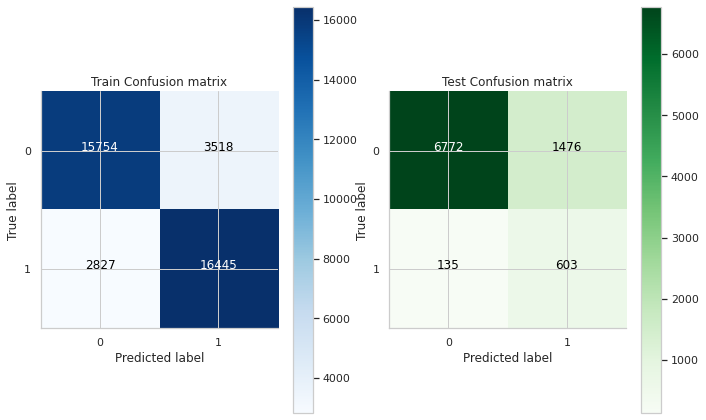

In [128]:
begin = time.time()
solvers = ['newton-cg', 'saga', 'liblinear']
penalty = ['l1']
c_values = [100,10,0.1]
# define grid search
params = dict(solver=solvers,penalty=penalty,C=c_values)
#folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
folds=5
estimator = LogisticRegression()
model_cv = GridSearchCV(estimator = estimator, 
                        param_grid = params, 
                        scoring= 'accuracy',  
                        cv = folds, 
                        n_jobs=-1
                        )            
model_cv.fit(X_train, y_train)
display(model_cv.best_estimator_)
lasso=model_cv.best_estimator_
lasso.fit(X_train, y_train) 
lm_lasso_metric=prediction_matrix(lasso,X_train,X_test,y_train,y_test)
end = time.time()
time_taken=end-begin
print('Time taken to predict train and test {} sec'.format(time_taken))

### 4. Logistics Regression with ElasticNet Regularisation

LogisticRegression(C=400, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.9, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

Time taken to predict train and test 61.43967533111572 sec


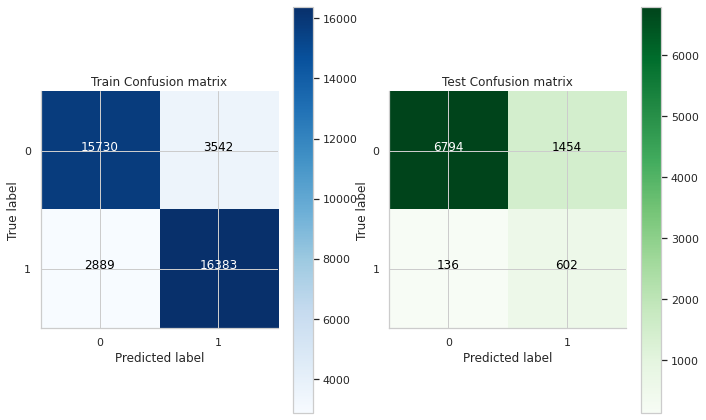

In [129]:
begin = time.time()
solvers = ['liblinear','saga']
penalty = ['elasticnet']
c_values = [2000,1000,600,400]
l1_ratio = [0.5,0.7,0.9]
tol= [0.01]
# define grid search
params = dict(solver=solvers,penalty=penalty,C=c_values,l1_ratio=l1_ratio,tol=tol)
#folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
folds=5
estimator = LogisticRegression()
model_cv = GridSearchCV(estimator = estimator, 
                        param_grid = params, 
                        scoring= 'accuracy',  
                        cv = folds, 
                        n_jobs=-1
                        )            
model_cv.fit(X_train, y_train)
display(model_cv.best_estimator_)
elasticnet=model_cv.best_estimator_
lasso.fit(X_train, y_train) 
lm_elasticnet_metric=prediction_matrix(elasticnet,X_train,X_test,y_train,y_test)
end = time.time()
time_taken=end-begin
print('Time taken to predict train and test {} sec'.format(time_taken))

### 5. Decision Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Time taken to predict train and test 290.92544412612915 sec


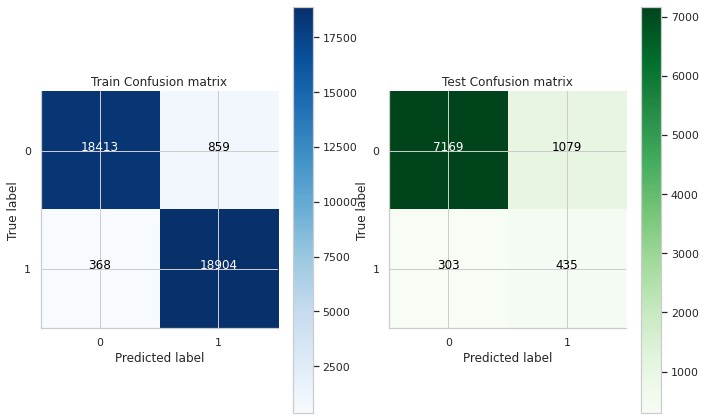

In [130]:
begin = time.time()
params = {
    'criterion':['gini'],
    'splitter':['best'],
    'max_depth':[15,20,40],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[3,5,10],
    'random_state':[42],
}
estimator = tree.DecisionTreeClassifier()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = estimator, 
                        param_grid = params, 
                        scoring= 'accuracy',  
                        cv = folds, 
                        n_jobs= -1)  
model_cv.fit(X_train, y_train)
display(model_cv.best_estimator_)
lm_dt=model_cv.best_estimator_
lm_dt.fit(X_train, y_train) 
lm_dt_metric=prediction_matrix(lm_dt,X_train,X_test,y_train,y_test)
end = time.time()
time_taken=end-begin
print('Time taken to predict train and test {} sec'.format(time_taken))

### 6. Random Forest

[1.0, 0.92, 1.0, 0.57, 1.0, 0.49, 1.0, 0.76, 1.0, 0.53]

Time taken to predict train and test 32.69740104675293 sec


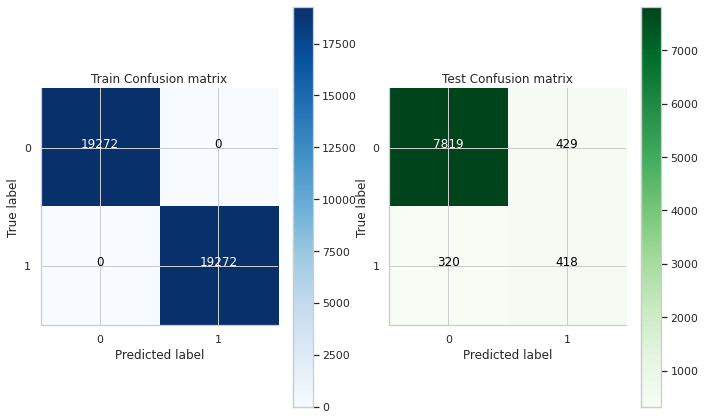

In [ ]:
### Default Random Forest
begin = time.time()
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
display(prediction_matrix(rfc,X_train,X_test,y_train,y_test))
end = time.time()
time_taken=end-begin
print('Time taken to predict train and test {} sec'.format(time_taken))

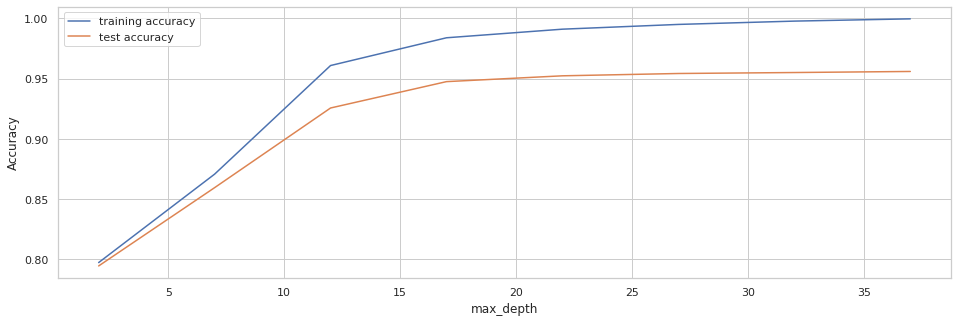

Time taken to predict train and test 609.4667098522186 sec


In [ ]:
### Tuning Depth
parameters = {'max_depth': range(2, 40, 5)}
tune_hyperparameter(RandomForestClassifier(),parameters,X_train,y_train)

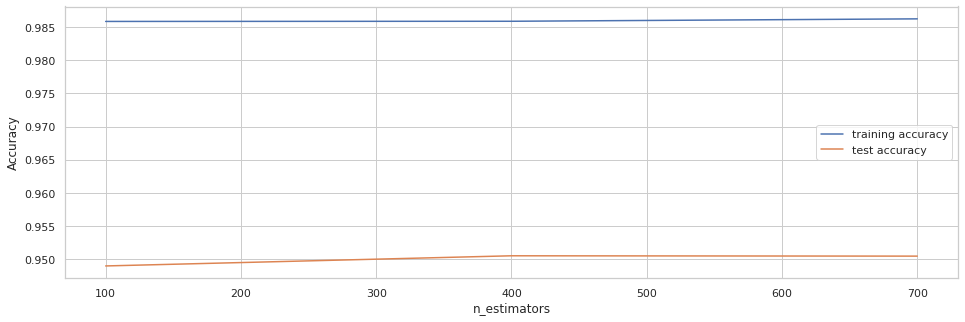

Time taken to predict train and test 1098.9617035388947 sec


In [ ]:
### Tuning n_estimators
parameters = {'n_estimators': range(100, 1000, 300),'max_depth': [18]}
tune_hyperparameter(RandomForestClassifier(),parameters,X_train,y_train)

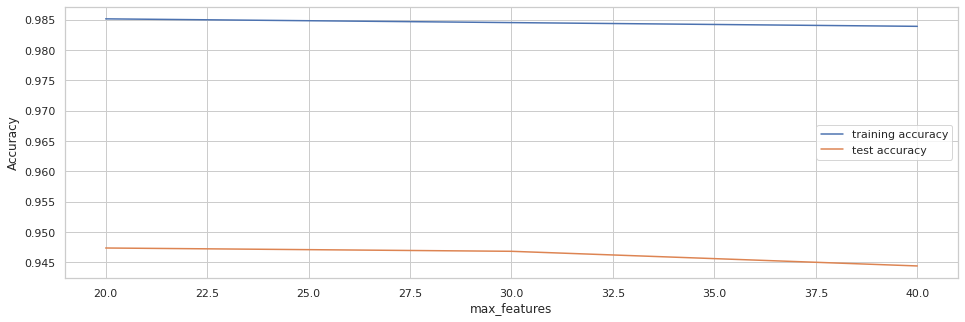

Time taken to predict train and test 1099.0215826034546 sec


In [ ]:
### Tuning max_features
parameters = {'max_features': [20,30,40,50,60],'max_depth': [18]}
tune_hyperparameter(RandomForestClassifier(),parameters,X_train,y_train)

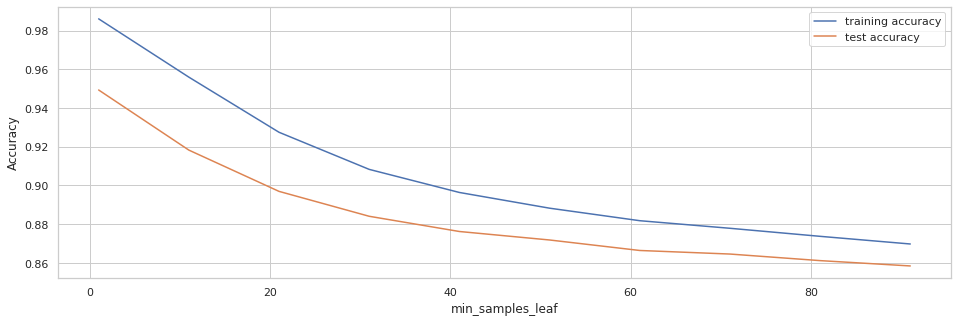

Time taken to predict train and test 687.8498287200928 sec


In [ ]:
### Tuning min_samples_leaf
parameters = {'min_samples_leaf': range(1, 50, 10),'max_depth': [18]}
tune_hyperparameter(RandomForestClassifier(),parameters,X_train,y_train)

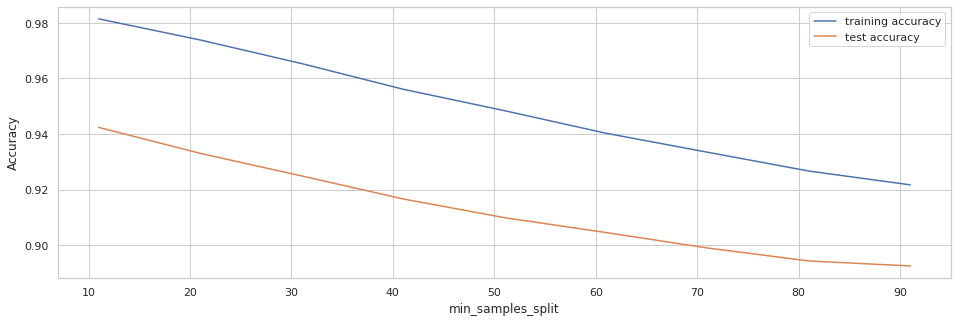

Time taken to predict train and test 724.5375492572784 sec


In [ ]:
### Tuning min_samples_split
parameters = {'min_samples_split': range(1, 50, 10),'max_depth': [18]}
tune_hyperparameter(RandomForestClassifier(),parameters,X_train,y_train)

Time taken to predict train and test 1348.1958177089691 sec


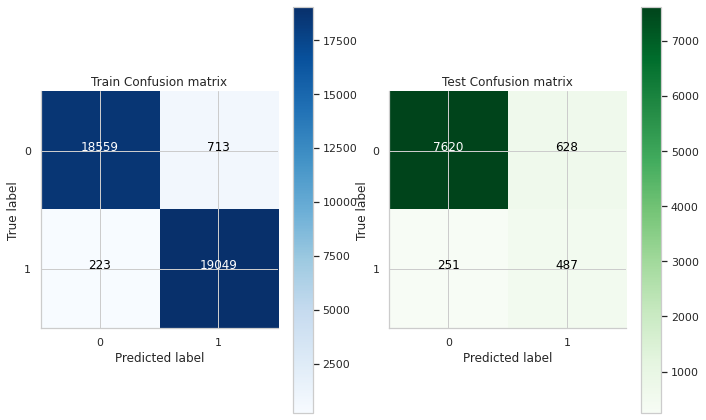

In [132]:
### Final Hypertuned version
begin = time.time()
lm_rfc=RandomForestClassifier(criterion='gini',max_depth=30,min_samples_split=5,min_samples_leaf=8,random_state=42,max_features=40,n_estimators=700)
lm_rfc.fit(X_train, y_train) 
lm_rfc_metric=prediction_matrix(lm_rfc,X_train,X_test,y_train,y_test)
end = time.time()
time_taken=end-begin
print('Time taken to predict train and test {} sec'.format(time_taken))

### 7. KNN Classification

Time taken to predict train and test 132.0625786781311 sec


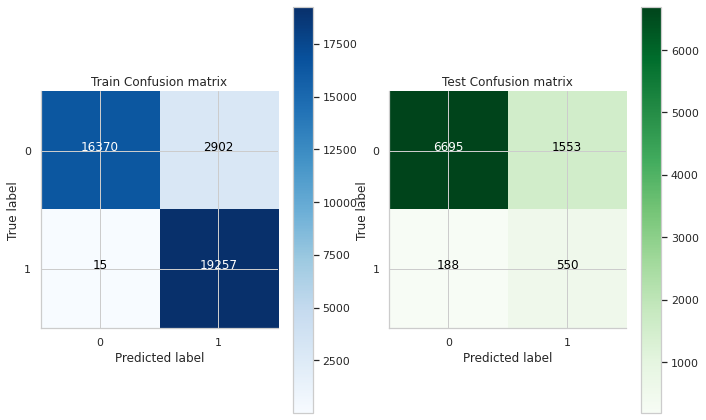

In [133]:
begin = time.time()
lm_knn=KNeighborsClassifier(n_neighbors=5)
lm_knn.fit(X_train, y_train) 
lm_knn_metric=prediction_matrix(lm_knn,X_train,X_test,y_train,y_test)
end = time.time()
time_taken=end-begin
print('Time taken to predict train and test {} sec'.format(time_taken))

### 8. GradientBoosting Classification

Time taken to predict train and test 324.0238857269287 sec


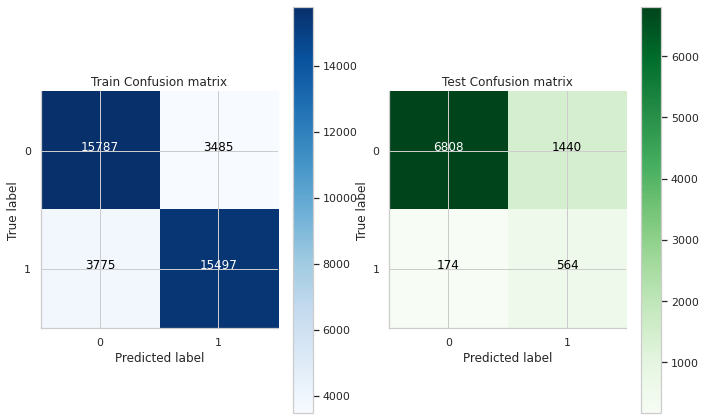

In [134]:
begin = time.time()
lm_gbr = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, max_depth=1, random_state=42)
lm_gbr.fit(X_train, y_train) 
lm_gbr_metric=prediction_matrix(lm_gbr,X_train,X_test,y_train,y_test)
end = time.time()
time_taken=end-begin
print('Time taken to predict train and test {} sec'.format(time_taken))

### 9. XGB Classifier

[0.87, 0.86, 0.86, 0.76, 0.87, 0.34, 0.87, 0.81, 0.87, 0.47]

Time taken to predict train and test 14.197592496871948 sec


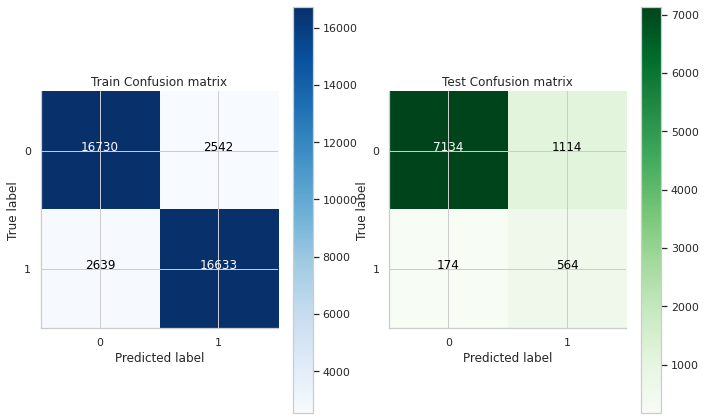

In [135]:
### Default XG Boost
begin = time.time()
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
display(prediction_matrix(xgb,X_train,X_test,y_train,y_test))
end = time.time()
time_taken=end-begin
print('Time taken to predict train and test {} sec'.format(time_taken))

[22:56:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


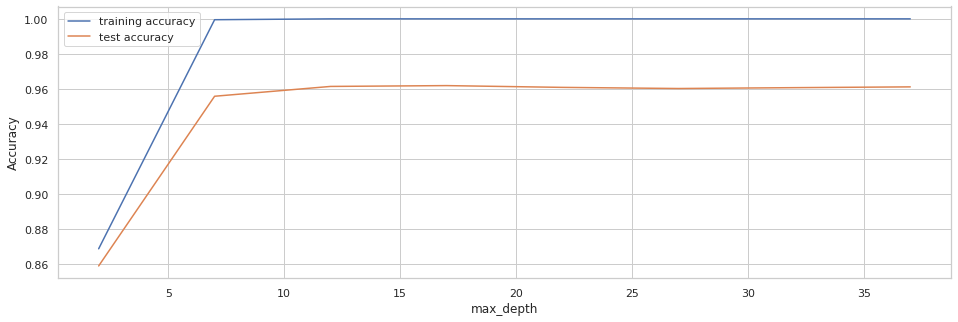

Time taken to predict train and test 3036.060967206955 sec


In [ ]:
###  Hyperparamter tuning
### Tuning max_depth rate
parameters = {'max_depth': range(0, 40, 8)}
tune_hyperparameter(XGBClassifier(),parameters,X_train,y_train)

[23:25:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


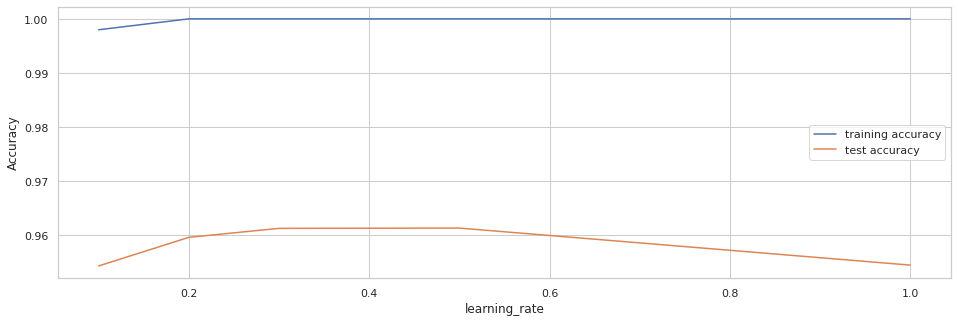

Time taken to predict train and test 1690.679577589035 sec


In [ ]:
### Tuning learning rate
parameters = {'learning_rate': [0.1,0.2,0.3,0.5,1],'max_depth': [10]}   
tune_hyperparameter(XGBClassifier(),parameters,X_train,y_train)

[23:43:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


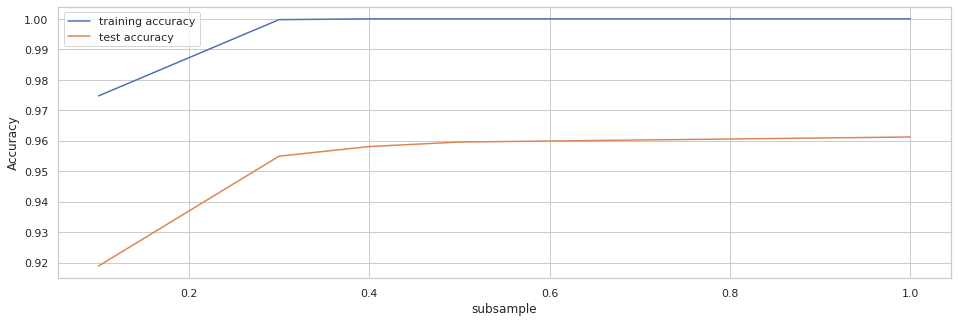

Time taken to predict train and test 1095.5617322921753 sec


In [ ]:
### Tuning learning rate
parameters = {'subsample': [0.1,0.3,0.4,0.5,1],'max_depth': [10]}   
tune_hyperparameter(XGBClassifier(),parameters,X_train,y_train)

[02:46:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


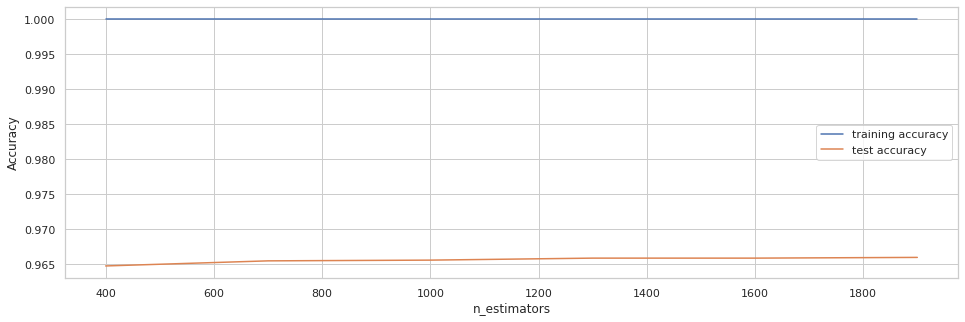

Time taken to predict train and test 11398.060564041138 sec


In [ ]:
### Tuning n_estimators
parameters = {'n_estimators': range(500, 2000, 500),'max_depth': [10]}   
tune_hyperparameter(XGBClassifier(),parameters,X_train,y_train)

[03:23:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


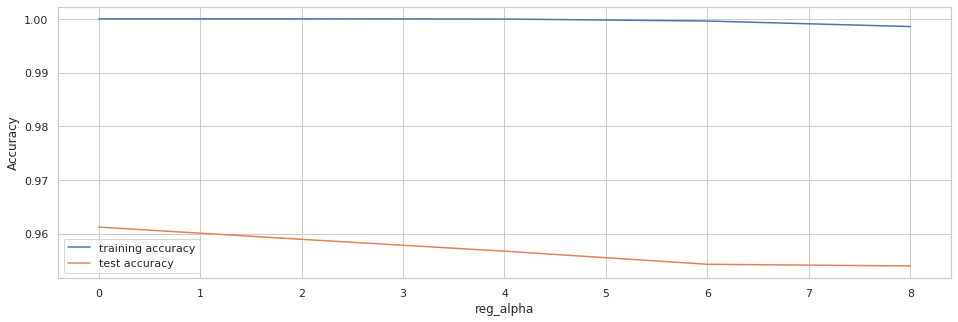

Time taken to predict train and test 1778.0855679512024 sec


In [ ]:
### Tuning reg_alpha rate
parameters = {'reg_alpha':  range(0, 10, 2),  'max_depth': [10]}   
tune_hyperparameter(XGBClassifier(),parameters,X_train,y_train)

In [ ]:
### Tuning reg_lambda rate
parameters = {'reg_lambda':  range(0, 10, 2),  'max_depth': [10]}   
tune_hyperparameter(XGBClassifier(),parameters,X_train,y_train)

Time taken to predict train and test 321.51787424087524 sec


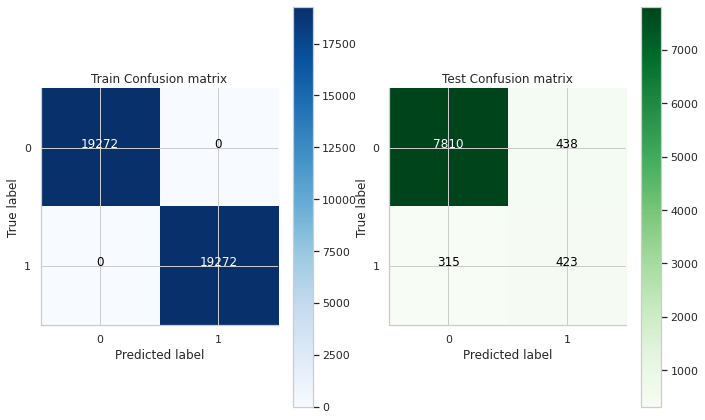

In [136]:
#### Final Hyperparamter tuning
begin = time.time()
lm_xgb = XGBClassifier(n_estimators=1500, learning_rate=0.1, max_depth=10, random_state=42,min_child_weight=5,colsample_bytree=0.7,
                   subsample=0.6, reg_alpha=1,reg_lambda=1,num_parallel_tree=1)
lm_xgb.fit(X_train, y_train) 
lm_xgb_metric=prediction_matrix(lm_xgb,X_train,X_test,y_train,y_test)
end = time.time()
time_taken=end-begin
print('Time taken to predict train and test {} sec'.format(time_taken))

### 10. Stacked Classification

In [138]:
'''
begin = time.time()
estimators = [
    ('lr', lm),
    ("lasso",lasso),
    ('ridge',ridge),
    ('elasticnet',elasticnet),
    ('dt',lm_dt),
    ('rfc',lm_rfc),
    ('knn',lm_knn),
    ('gbr',lm_gbr),
     ('xgb',lm_xgb)   
]
lm_stack = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())
lm_stack.fit(X_train, y_train)
lm_stack_metric=prediction_matrix(lm_stack,X_train,X_test,y_train,y_test)
end = time.time()
time_taken=end-begin
print('Time taken to predict train and test {} sec'.format(time_taken))
'''

'\nbegin = time.time()\nestimators = [\n    (\'lr\', lm),\n    ("lasso",lasso),\n    (\'ridge\',ridge),\n    (\'elasticnet\',elasticnet),\n    (\'dt\',lm_dt),\n    (\'rfc\',lm_rfc),\n    (\'knn\',lm_knn),\n    (\'gbr\',lm_gbr),\n     (\'xgb\',lm_xgb)   \n]\nlm_stack = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())\nlm_stack.fit(X_train, y_train)\nlm_stack_metric=prediction_matrix(lm_stack,X_train,X_test,y_train,y_test)\nend = time.time()\ntime_taken=end-begin\nprint(\'Time taken to predict train and test {} sec\'.format(time_taken))\n'

In [139]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['Accuary (Train)','Accuary (Test)','Precision (Train)','Precision (Test)','Recall (Train)','Recall (Test)',
                       'AUC (Train)','AUC (Test)','F1 Score (Train)','F1 Score (Test)'], 
        'Logistic Regression': lm_metric
        }

metric_lm = pd.DataFrame(lr_table ,columns = ['Metric', 'Logistic Regression'] )
metric_lm_ridge = pd.Series(lm_ridge_metric, name = 'L2 Logistic Regression')
metric_lm_lasso = pd.Series(lm_lasso_metric, name = 'L1 Logistic Regression')
metric_lm_elasticnet = pd.Series(lm_elasticnet_metric, name = 'Elasticnet Logistic Regression')
metric_lm_dt = pd.Series(lm_dt_metric,name = 'Decision Tree Classification')
metric_lm_rfc = pd.Series(lm_rfc_metric, name = 'Random Forest Classification')
metric_lm_knn= pd.Series(lm_knn_metric, name = 'KNN Classification')
metric_lm_gbr = pd.Series(lm_gbr_metric, name = 'Gradient Boosting Classification')
metric_lm_xgb = pd.Series(lm_xgb_metric, name = 'XGB Classification')
#metric_lm_stack = pd.Series(lm_stack_metric, name = 'Stacked Classification')
final_metric = pd.concat([metric_lm,metric_lm_ridge,metric_lm_lasso,metric_lm_elasticnet,metric_lm_dt,metric_lm_rfc,metric_lm_knn,metric_lm_gbr,metric_lm_xgb], axis = 1)
print("Model Peformance Metric:")
display(final_metric)

Model Peformance Metric:


,Metric,Logistic Regression,L2 Logistic Regression,L1 Logistic Regression,Elasticnet Logistic Regression,Decision Tree Classification,Random Forest Classification,KNN Classification,Gradient Boosting Classification,XGB Classification
0,Accuary (Train),0.84,0.84,0.84,0.83,0.97,0.98,0.92,0.81,1.00
1,Accuary (Test),0.82,0.82,0.82,0.82,0.85,0.90,0.81,0.82,0.92
2,Precision (Train),0.85,0.85,0.85,0.85,0.98,0.99,1.00,0.80,1.00
3,Precision (Test),0.82,0.82,0.82,0.82,0.59,0.66,0.75,0.76,0.57
4,Recall (Train),0.82,0.82,0.82,0.82,0.96,0.96,0.87,0.82,1.00
5,Recall (Test),0.29,0.29,0.29,0.29,0.29,0.44,0.26,0.28,0.49
6,AUC (Train),0.84,0.84,0.84,0.83,0.97,0.98,0.92,0.81,1.00
7,AUC (Test),0.82,0.82,0.82,0.82,0.73,0.79,0.78,0.79,0.76
8,F1 Score (Train),0.84,0.84,0.84,0.84,0.97,0.98,0.93,0.81,1.00
9,F1 Score (Test),0.43,0.43,0.43,0.43,0.39,0.53,0.39,0.41,0.53


In [140]:
print("Important features ...")
col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(15)

Important features ...


,PC1,PC2,PC3,Feature
0,0.00,0.29,0.15,arpu_8
1,-0.11,0.11,0.15,onnet_mou_8
2,-0.10,0.20,0.11,offnet_mou_8
3,-0.01,0.05,0.01,roam_ic_mou_8
4,-0.02,0.07,0.03,roam_og_mou_8
5,-0.03,0.10,0.02,loc_og_t2t_mou_8
6,-0.03,0.18,-0.03,loc_og_t2m_mou_8
7,0.01,0.11,-0.09,loc_og_t2f_mou_8
8,-0.01,0.02,0.08,loc_og_t2c_mou_8
9,-0.11,0.07,0.16,std_og_t2t_mou_8


In [143]:
feature_importance(lm_rfc.feature_importances_,X_scaled,'Random Forest')
feature_importance(lm_xgb.feature_importances_,X_scaled,'Xtreme Gradient Boosting')
#feature_importance(lm.coef_,X_scaled,'Logistic Regression')
##feature_importance(ridge.coef_,X_scaled,'Logistic with L2 Regularisation')
#feature_importance(lasso.coef_,X_scaled,'Logistic with L1 Regularisation')
#feature_importance(elasticnet.coef_,X_scaled,'Logistic with Elasticnet Regularisation')
feature_importance(lm_dt.feature_importances_,X_scaled,'Decision Tree')
feature_importance(lm_gbr.feature_importances_,X_scaled,'Gradient Boosting')


## Recommendation

1. Less number of high value customer are churing but for last 6 month no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect.

2. Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.

3. Average revenue per user seems to be most important feature in determining churn prediction.

4. Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour

5. Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

6. Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.

## Model Insights:

1. Random forest also produce good accuracy with 0.91 (default overfit model) and 0.90 with tuned hyperparameters.

2. XGBoost also produce apt accuracy of 0.89 (default overfit model) and 0.90 with tuned hyperparameters.